In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

In [398]:
df_cities = pd.read_csv('Indian Cities Database.csv')
df_cities.head()

,City,Lat,Long,country,iso2,State
0,Abohar,30.144533,74.195520,India,IN,Punjab
1,Adilabad,19.400000,78.310000,India,IN,Telangana
2,Agartala,23.836049,91.279386,India,IN,Tripura
3,Agra,27.187935,78.003944,India,IN,Uttar Pradesh
4,Ahmadnagar,19.094571,74.738432,India,IN,Maharashtra


In [399]:
df_cities_copy = df_cities.copy()

In [400]:
df_cities_copy['Source'] = df_cities_copy['City'].copy()

In [401]:
df_cities_copy['Source'] = df_cities_copy['Source'].replace({'Bengaluru': 'Banglore', 'Calicut': 'Kolkata', 'Kochi': 'Cochin'})

In [402]:
merged_df = df.merge(df_cities_copy, on='Source', how='left')

In [419]:
pd.set_option('display.max_columns', 36)
merged_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Day,Week,Month,Quarter,Year,WeekName,Season,Is_Weekday,Is_Weekend,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Type_of_Day,Arr_Type_of_Day,City1,City2,City3,City4,City5,City6,Duration_Hours,Lat_Source,Long_Source,Lat_Destination,Long_Destination,Distance
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",170,0,3897,24,12,3,1,2019,Sunday,2,0,1,22,20,1,10,Night,Late Night,BLR,DEL,None,None,None,None,2.833333,12.977063,77.587106,28.600000,77.200000,1737.653224
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",445,2,7662,1,18,5,2,2019,Wednesday,2,1,0,5,50,13,15,Early Morning,Afternoon,CCU,IXR,BBI,BLR,None,None,7.416667,11.248016,75.780402,12.977063,77.587106,274.851302
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",1140,2,13882,9,23,6,2,2019,Sunday,3,0,1,9,25,4,25,Morning,Early Morning,DEL,LKO,BOM,COK,None,None,19.000000,28.651952,77.231495,9.947743,76.253802,2082.311722
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",325,1,6218,12,19,5,2,2019,Sunday,2,0,1,18,5,23,30,Evening,Night,CCU,NAG,BLR,None,None,None,5.416667,11.248016,75.780402,12.977063,77.587106,274.851302
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",285,1,13302,1,9,3,1,2019,Friday,2,1,0,16,50,21,35,Afternoon,Night,BLR,NAG,DEL,None,None,None,4.750000,12.977063,77.587106,28.600000,77.200000,1737.653224


In [417]:
merged_df.rename(columns={'Source_x': 'Source'}, inplace=True)

In [404]:
merged_df.drop(['State', 'iso2', 'country'], axis=1, inplace=True)

In [405]:
merged_df.rename(columns={'Lat': 'Lat_Source', 'Long': 'Long_Source'}, inplace=True)

In [406]:
df_cities_copy['Destination'] = df_cities_copy['City'].copy()

In [407]:
df_cities_copy['Destination'] = df_cities_copy['Destination'].replace({'Bengaluru': 'Banglore', 'Calicut': 'Kolkata', 'Kochi': 'Cochin'})

In [408]:
merged_df = merged_df.merge(df_cities_copy, on='Destination', how='left')

In [409]:
merged_df.drop(['State', 'iso2', 'country'], axis=1, inplace=True)

In [410]:
merged_df.rename(columns={'Lat': 'Lat_Destination', 'Long': 'Long_Destination'}, inplace=True)

In [411]:
merged_df.drop(['City_x', 'City_y', 'Source_y'], axis=1, inplace=True)

In [412]:
def distance_trip(p_lat, d_lat, p_lon, d_lon):
    p_lon = radians(p_lon)
    d_lon = radians(d_lon)
    p_lat = radians(p_lat)
    d_lat = radians(d_lat)
    
    dlon = d_lon - p_lon
    dlat = d_lat - p_lat
    a = sin(dlat / 2)**2 + cos(p_lat) * cos(d_lat) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    r = 6371

    return(c * r)

In [413]:
merged_df['Distance'] = merged_df.apply(lambda x: distance_trip(x['Lat_Source'],
                                                         x['Lat_Destination'],
                                                         x['Long_Source'],
                                                         x['Long_Destination']), axis=1)

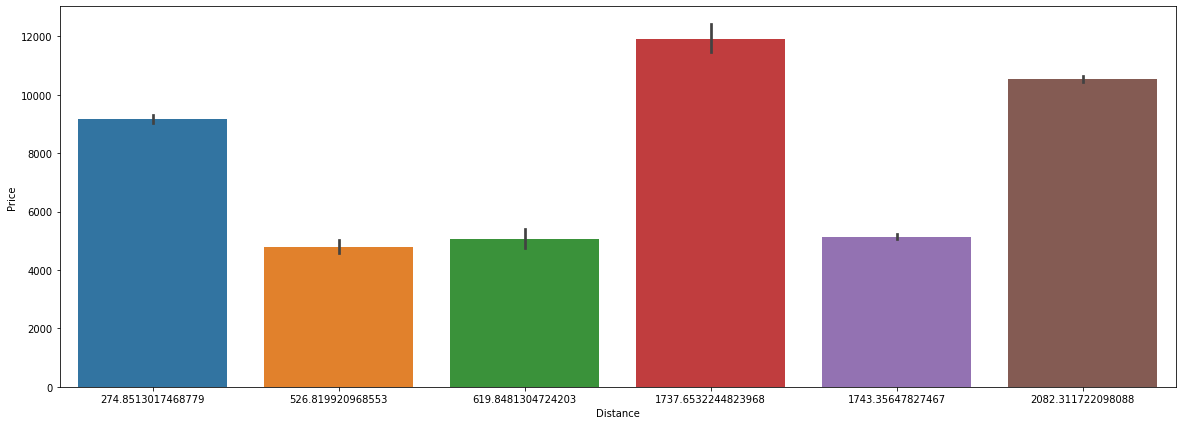

In [302]:
plt.figure(figsize=(20, 7))
sns.barplot(data=merged_df, x='Distance', y='Price')
plt.show()

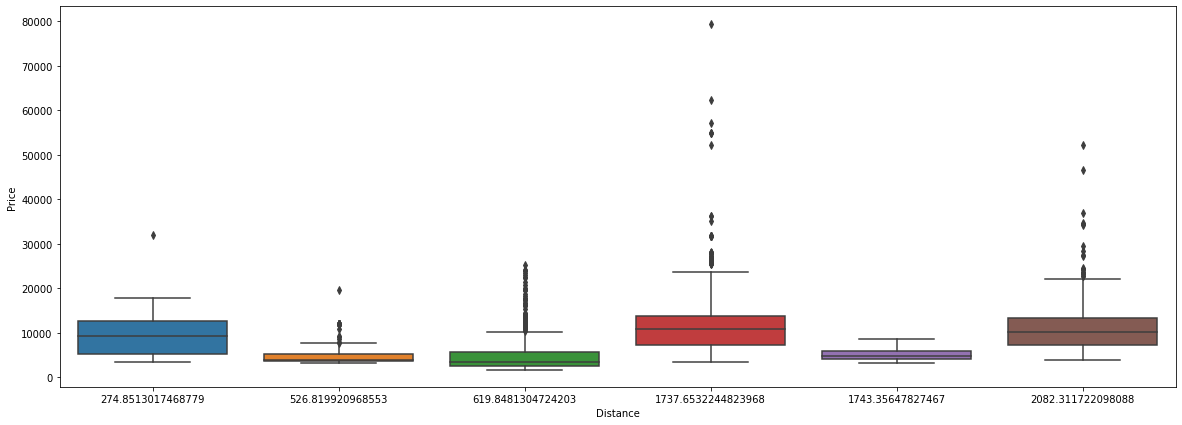

In [313]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=merged_df, x='Distance', y='Price')
plt.show()

In [296]:
merged_df['Flight_Dep_Type'] = df['Airline'] + '_' + df['Dep_Type_of_Day']
merged_df['Flight_Arr_Type'] = df['Airline'] + '_' + df['Arr_Type_of_Day']

In [297]:
merged_df.loc[(merged_df['Distance']>1500) & (merged_df['Distance']<1800), :]

,Airline,Date_of_Journey,Source_x,Destination,Route,Duration,Total_Stops,Price,Day,Week,Month,Quarter,Year,WeekName,Season,Is_Weekday,Is_Weekend,...,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Type_of_Day,Arr_Type_of_Day,City1,City2,City3,City4,City5,City6,Lat_Source,Long_Source,Lat_Destination,Long_Destination,Distance,Flight_Dep_Type,Flight_Arr_Type
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",170,0,3897,24,12,3,1,2019,Sunday,2,0,1,...,1,10,Night,Late Night,BLR,DEL,None,None,None,None,12.977063,77.587106,28.600000,77.200000,1737.653224,IndiGo_Night,IndiGo_Late Night
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",285,1,13302,1,9,3,1,2019,Friday,2,1,0,...,21,35,Afternoon,Night,BLR,NAG,DEL,None,None,None,12.977063,77.587106,28.600000,77.200000,1737.653224,IndiGo_Afternoon,IndiGo_Night
6,Jet Airways,2019-03-12,Banglore,New Delhi,"[BLR , BOM , DEL]",930,1,11087,12,11,3,1,2019,Tuesday,2,1,0,...,10,25,Evening,Morning,BLR,BOM,DEL,None,None,None,12.977063,77.587106,28.600000,77.200000,1737.653224,Jet Airways_Evening,Jet Airways_Morning
7,Jet Airways,2019-03-01,Banglore,New Delhi,"[BLR , BOM , DEL]",1265,1,22270,1,9,3,1,2019,Friday,2,1,0,...,5,5,Morning,Early Morning,BLR,BOM,DEL,None,None,None,12.977063,77.587106,28.600000,77.200000,1737.653224,Jet Airways_Morning,Jet Airways_Early Morning
8,Jet Airways,2019-03-12,Banglore,New Delhi,"[BLR , BOM , DEL]",1530,1,11087,12,11,3,1,2019,Tuesday,2,1,0,...,10,25,Morning,Morning,BLR,BOM,DEL,None,None,None,12.977063,77.587106,28.600000,77.200000,1737.653224,Jet Airways_Morning,Jet Airways_Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10666,Jet Airways,2019-03-12,Banglore,New Delhi,"[BLR , BOM , DEL]",1285,1,11087,12,11,3,1,2019,Tuesday,2,1,0,...,20,20,Night,Evening,BLR,BOM,DEL,None,None,None,12.977063,77.587106,28.600000,77.200000,1737.653224,Jet Airways_Evening,Jet Airways_Evening
10673,Jet Airways,2019-03-12,Banglore,New Delhi,"[BLR , BOM , DEL]",1485,1,11087,12,11,3,1,2019,Tuesday,2,1,0,...,21,20,Evening,Night,BLR,BOM,DEL,None,None,None,12.977063,77.587106,28.600000,77.200000,1737.653224,Jet Airways_Afternoon,Jet Airways_Early Morning
10676,SpiceJet,2019-05-21,Banglore,Delhi,"[BLR , DEL]",160,0,3257,21,21,5,2,2019,Tuesday,2,1,0,...,8,35,Early Morning,Morning,BLR,DEL,None,None,None,None,12.977063,77.587106,28.651952,77.231495,1743.356478,Multiple carriers_Morning,Multiple carriers_Evening
10679,Jet Airways,2019-04-27,Banglore,Delhi,"[BLR , DEL]",180,0,7229,27,17,4,2,2019,Saturday,2,0,1,...,11,20,Morning,Morning,BLR,DEL,None,None,None,None,12.977063,77.587106,28.651952,77.231495,1743.356478,Air India_Evening,Air India_Night


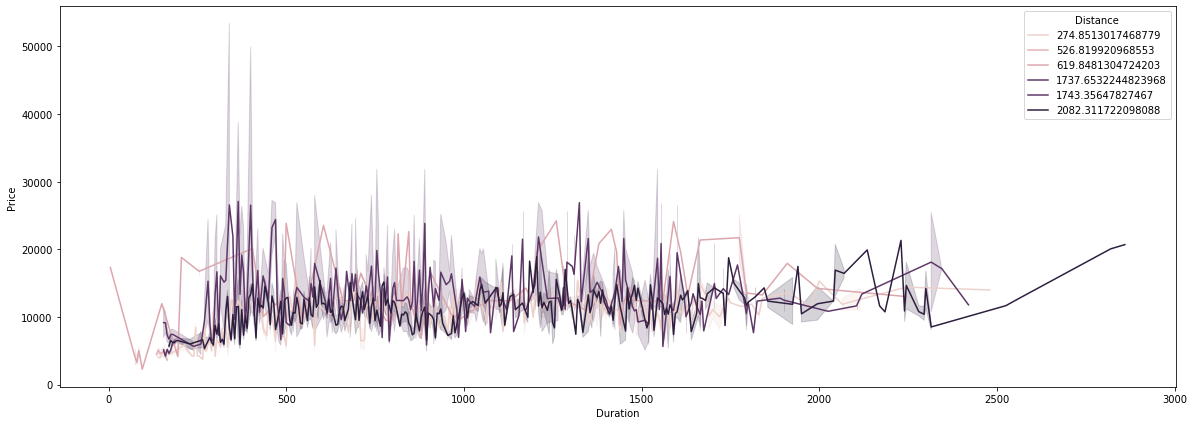

In [316]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=merged_df, x='Duration', y='Price', hue='Distance')
plt.show()

<AxesSubplot:xlabel='Month,Duration'>

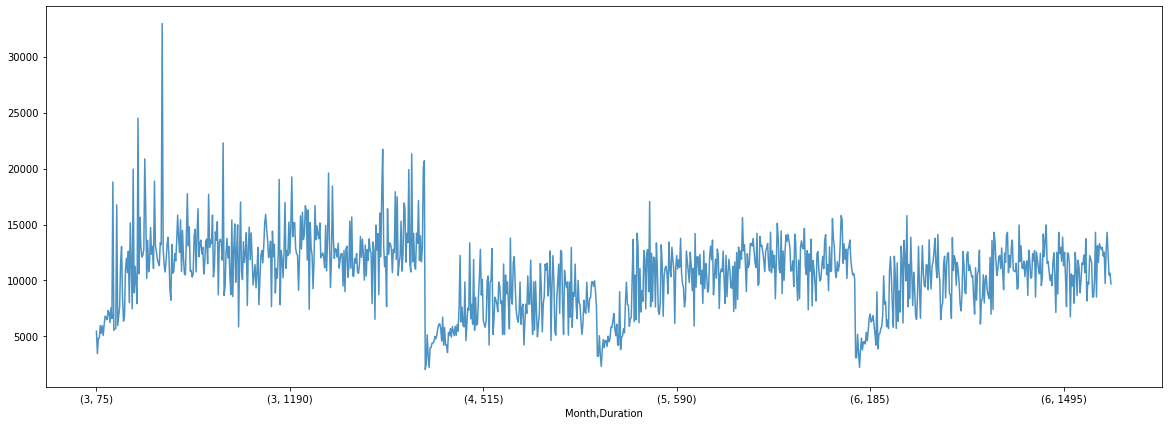

In [334]:
df.groupby(['Month', 'Duration'])['Price'].mean().plot(figsize=(20, 7), style='-', alpha=0.8)

<AxesSubplot:xlabel='Quarter,Duration'>

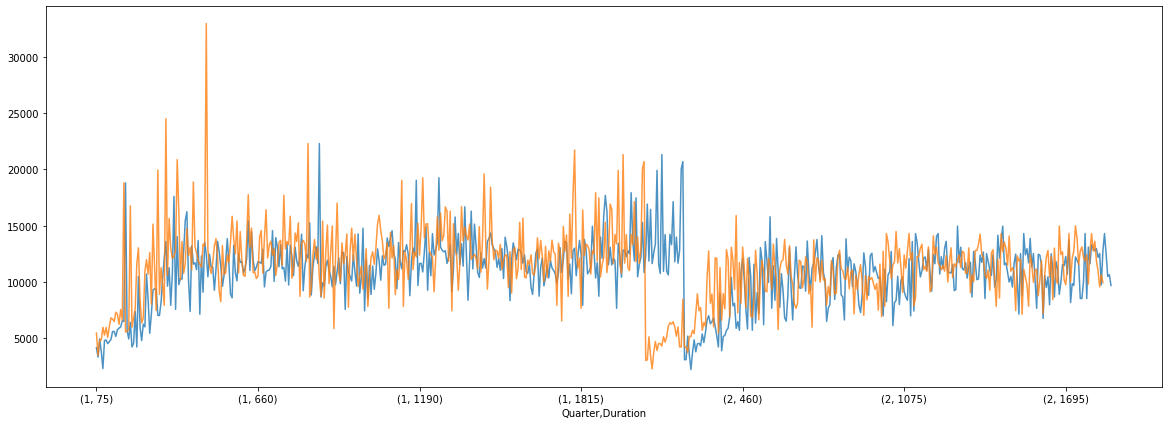

In [335]:
df.groupby(['Season', 'Duration'])['Price'].mean().plot(figsize=(20, 7), style='-', alpha=0.8)
df.groupby(['Quarter', 'Duration'])['Price'].mean().plot(figsize=(20, 7), style='-', alpha=0.8)

In [351]:
merged_df['Date_of_Journey'].dtype

dtype('<M8[ns]')

In [352]:
merged_df['Arrival_Date'] = merged_df['Date_of_Journey'] + datetime.timedelta(minutes=merged_df['Duration'])

TypeError: unsupported type for timedelta minutes component: Series

In [354]:
merged_df['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10677   2019-04-09
10678   2019-04-27
10679   2019-04-27
10680   2019-03-01
10681   2019-05-09
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

In [353]:
merged_df['Date_of_Journey'] + pd.TimedeltaIndex(merged_df['Duration'], unit='minutes')

0       2019-03-24 02:50:00
1       2019-05-01 07:25:00
2       2019-06-09 19:00:00
3       2019-05-12 05:25:00
4       2019-03-01 04:45:00
                ...        
10677   2019-04-09 02:30:00
10678   2019-04-27 02:35:00
10679   2019-04-27 03:00:00
10680   2019-03-01 02:40:00
10681   2019-05-09 08:20:00
Length: 10682, dtype: datetime64[ns]

In [350]:
import datetime
dates = ['2019-1-24']
dt = datetime.datetime(2019, 1, 24, 21, 0, 0)
duration = 240
total_time = dt + datetime.timedelta(minutes=duration)
print(total_time)

2019-01-25 01:00:00


In [349]:
240/60

4.0

In [ ]:
pd.to_datetime(merged_df['Date_of_Journey'] + merged_df['Time'], format='%m-%d-%Y%H:%M:%S')

In [360]:
holidays = pd.read_csv('2019.csv')
holidays.head()

,date,day,holiday,holiday_type
0,2019-01-01,Tuesday,New Year's Day (R),Restricted
1,2019-01-13,Sunday,Guru Gobind Singh's Birthday (R),Restricted
2,2019-01-14,Monday,Makar Sankranti (R),Restricted
3,2019-01-15,Tuesday,Pongal (R),Restricted
4,2019-01-26,Saturday,Republic Day (G),Gazetted


In [382]:
holidays['holiday'].value_counts()

New Year's Day (R)                                                1
Dussehra (G)                                                      1
Parsi New Year's day/ Nauraj (R)                                  1
Janmashtami (G)                                                   1
Vinayaka Chaturthi/ Ganesh Chaturthi (R)                          1
Muharram (G)                                                      1
Onam or Thiru Onam Day (R)                                        1
Mahatma Gandhi's Birthday (G)                                     1
Dussehra (Maha Saptami) (Additional) (R)                          1
Dussehra (Maha Ashtami) (Additional) (R)                          1
Dussehra (Maha Navmi) (R)                                         1
Maharishi Valmiki's Birthday (R)                                  1
Guru Gobind Singh's Birthday (R)                                  1
Karaka Chaturthi (Karva Chouth) (R)                               1
Naraka Chaturdasi (R)                           

In [361]:
holidays.rename(columns={'date': 'Date_of_Journey'}, inplace=True)

In [365]:
holidays['Date_of_Journey'] = pd.to_datetime(holidays['Date_of_Journey'], infer_datetime_format=True)

In [370]:
merged_df_holiday = df.merge(holidays, on='Date_of_Journey', how='left')

In [371]:
df.shape

(10681, 30)

In [372]:
merged_df_holiday.shape

(10681, 33)

In [377]:
merged_df_holiday.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Day,Week,Month,Quarter,Year,WeekName,Season,Is_Weekday,Is_Weekend,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Type_of_Day,Arr_Type_of_Day,City1,City2,City3,City4,City5,City6,Duration_Hours,day,holiday,holiday_type
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",170,0,3897,24,12,3,1,2019,Sunday,2,0,1,22,20,1,10,Night,Late Night,BLR,DEL,None,None,None,None,2.833333,NaN,No Holiday,None
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",445,2,7662,1,18,5,2,2019,Wednesday,2,1,0,5,50,13,15,Early Morning,Afternoon,CCU,IXR,BBI,BLR,None,None,7.416667,NaN,No Holiday,None
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",1140,2,13882,9,23,6,2,2019,Sunday,3,0,1,9,25,4,25,Morning,Early Morning,DEL,LKO,BOM,COK,None,None,19.000000,NaN,No Holiday,None
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",325,1,6218,12,19,5,2,2019,Sunday,2,0,1,18,5,23,30,Evening,Night,CCU,NAG,BLR,None,None,None,5.416667,NaN,No Holiday,None
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",285,1,13302,1,9,3,1,2019,Friday,2,1,0,16,50,21,35,Afternoon,Night,BLR,NAG,DEL,None,None,None,4.750000,Friday,Swami Dayananda Saraswati Jayanti (R),Restricted


In [374]:
merged_df_holiday['holiday'].fillna('No Holiday', inplace=True)

In [376]:
merged_df_holiday['holiday_type'].fillna('None', inplace=True)

In [381]:
merged_df_holiday['holiday'].value_counts()

No Holiday                                              8800
Buddha Purnima (G)                                       504
Guru Rabindranath's Birthday (R)                         484
Dolyatra (R)                                             423
Swami Dayananda Saraswati Jayanti (R)                    199
Chaitra Sukladi/ Gudi Padava/ Ugadi/ Cheti Chand (R)     100
Vaisakhadi (Bengal)/ Bahag Bihu (Assam) (R)               89
Easter Sunday (R)                                         82
Name: holiday, dtype: int64

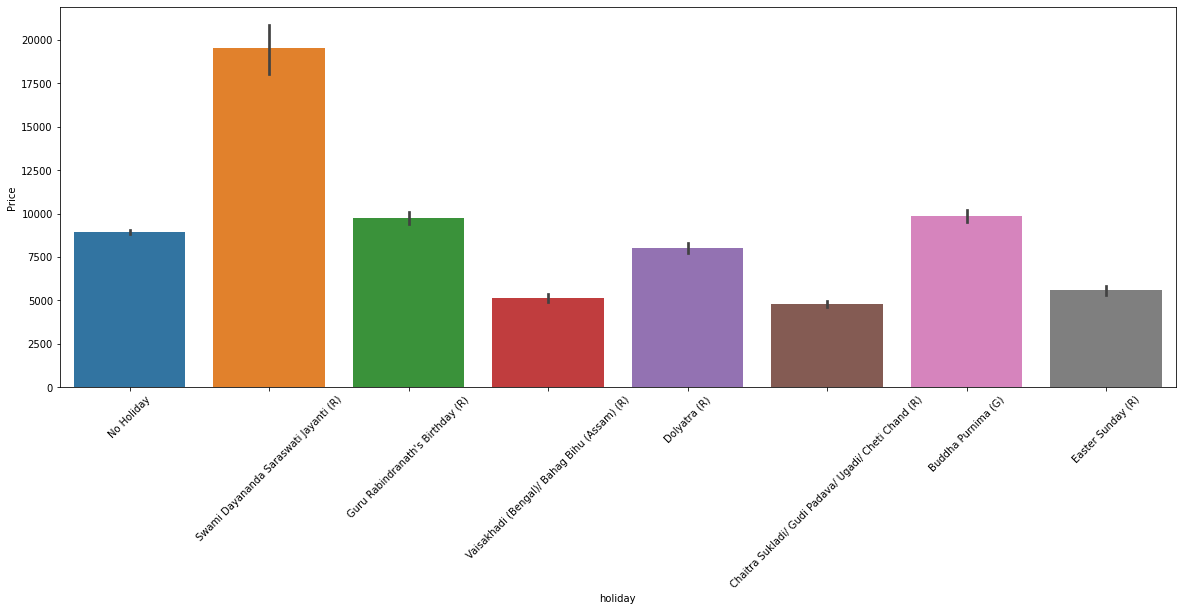

In [380]:
plt.figure(figsize=(20, 7))
sns.barplot(data=merged_df_holiday, x='holiday', y='Price')
plt.xticks(rotation=45)
plt.show()

In [392]:
merged_df_holiday.groupby(['Airline', 'holiday'])['Price'].mean().sort_values()

Airline               holiday                                             
Air Asia              Chaitra Sukladi/ Gudi Padava/ Ugadi/ Cheti Chand (R)     3637.400000
SpiceJet              Chaitra Sukladi/ Gudi Padava/ Ugadi/ Cheti Chand (R)     4047.266667
                      Guru Rabindranath's Birthday (R)                         4115.433333
Trujet                No Holiday                                               4140.000000
SpiceJet              No Holiday                                               4246.120357
                                                                                  ...     
Vistara               Swami Dayananda Saraswati Jayanti (R)                   18064.333333
Multiple carriers     Swami Dayananda Saraswati Jayanti (R)                   25595.200000
Jet Airways           Swami Dayananda Saraswati Jayanti (R)                   26602.112676
Jet Airways Business  No Holiday                                              49387.500000
               

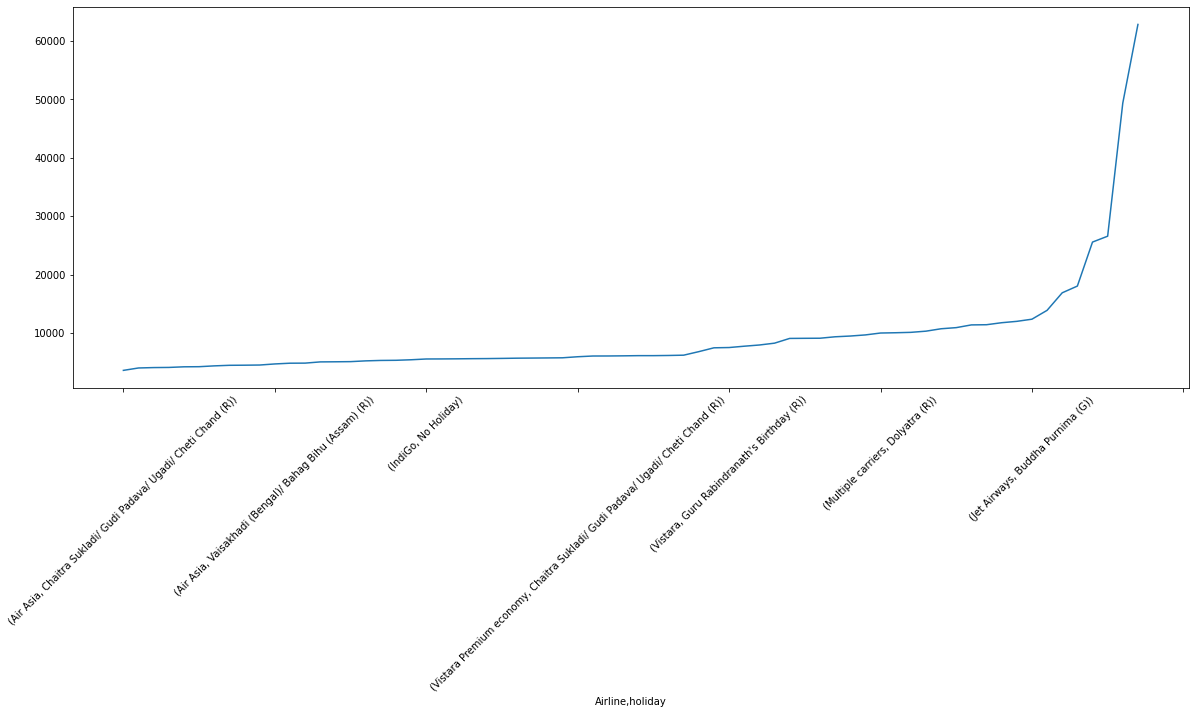

In [396]:
merged_df_holiday.groupby(['Airline', 'holiday'])['Price'].mean().sort_values().plot(figsize=(20, 7))
plt.xticks(rotation=45)
plt.show()

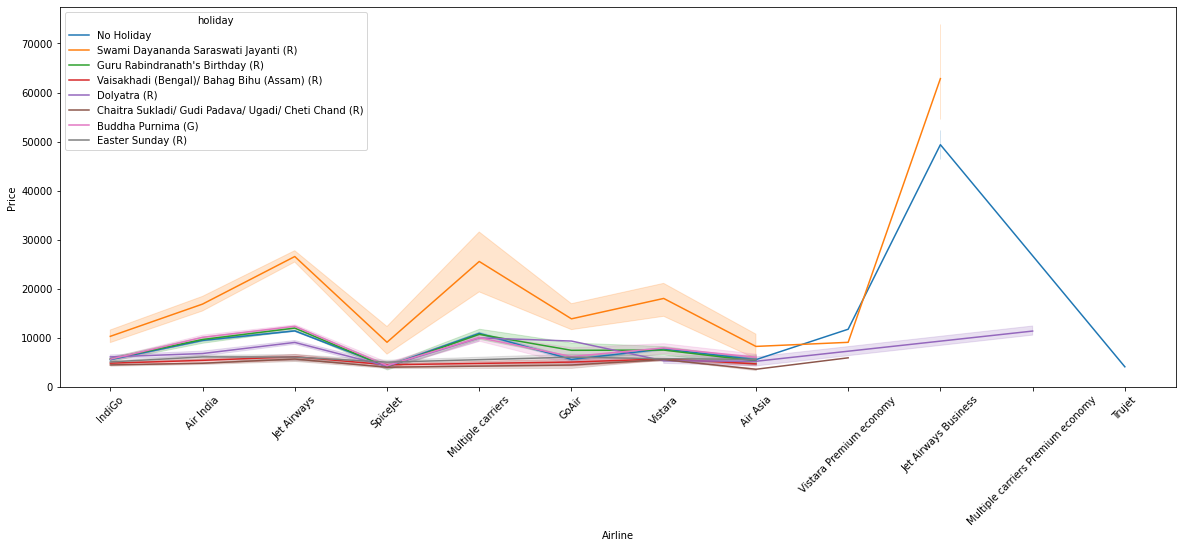

In [389]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=merged_df_holiday, x='Airline', y='Price', hue='holiday')
plt.xticks(rotation=45)
plt.show()

In [355]:
df_ = pd.read_excel('Data_Train.xlsx')
df_.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [359]:
pd.to_datetime(df_['Date_of_Journey'] + ' ' + df_['Dep_Time'])

0       2019-03-24 22:20:00
1       2019-01-05 05:50:00
2       2019-09-06 09:25:00
3       2019-12-05 18:05:00
4       2019-01-03 16:50:00
                ...        
10678   2019-09-04 19:55:00
10679   2019-04-27 20:45:00
10680   2019-04-27 08:20:00
10681   2019-01-03 11:30:00
10682   2019-09-05 10:55:00
Length: 10683, dtype: datetime64[ns]

In [6]:
df = pd.read_excel('Data_Train.xlsx')

In [50]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Is_Weekend,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_,Arrival_Time_Hour,Arrival_Time_Minute,Total_Departure_Time,Total_Arrival_Time,Dep_Type_of_Day,Arr_Type_of_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,"[22, 20]",01:10,170,non-stop,Null,...,1,22,20,"[01, 10]",1,10,2220,0110,Night,Late Night
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,"[05, 50]",13:15,445,2 stops,Null,...,0,5,50,"[13, 15]",13,15,0550,1315,Early Morning,Afternoon
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,"[09, 25]",04:25,1140,2 stops,Null,...,1,9,25,"[04, 25]",4,25,0925,0425,Morning,Early Morning
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,"[18, 05]",23:30,325,1 stop,Null,...,1,18,05,"[23, 30]",23,30,1805,2330,Evening,Night
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,"[16, 50]",21:35,285,1 stop,Null,...,0,16,50,"[21, 35]",21,35,1650,2135,Afternoon,Night


In [8]:
df.shape

(10683, 11)

In [9]:
percent_missing = ((df.isnull().sum())/(df.shape[0])) * 100
percent_missing

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,Null,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8346,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [14]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], infer_datetime_format=True)

In [15]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Week'] = df['Date_of_Journey'].dt.isocalendar().week
df['Month'] = df['Date_of_Journey'].dt.month
df['Quarter'] = df['Date_of_Journey'].dt.quarter
df['Year'] = df['Date_of_Journey'].dt.year
df['WeekName'] = df['Date_of_Journey'].dt.day_name()
df['Season'] = df['Month']%12 // 3 + 1
df['Is_Weekday'] = np.where(df['WeekName'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 1, 0)
df['Is_Weekend'] = np.where(df['WeekName'].isin(['Saturday', 'Sunday']), 1, 0)

In [16]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [17]:
df['Dep_Time'] = df['Dep_Time'].str.split(':')
df['Dep_Time_Hour'] = df['Dep_Time'].str[0]
df['Dep_Time_Minute'] = df['Dep_Time'].str[1]

In [18]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ')
df['Arrival_Time'] = df['Arrival_Time'].str[0]
df['Arrival_Time_'] = df['Arrival_Time'].str.split(':')
df['Arrival_Time_Hour'] = df['Arrival_Time_'].str[0]
df['Arrival_Time_Minute'] = df['Arrival_Time_'].str[1]

In [19]:
df['Total_Departure_Time'] = df['Dep_Time_Hour'] + df['Dep_Time_Minute']
df['Total_Arrival_Time'] = df['Arrival_Time_Hour'] + df['Arrival_Time_Minute']

In [48]:
df['Arrival_Time_Hour'] = df['Arrival_Time_Hour'].astype('int64')
df['Dep_Time_Hour'] = df['Dep_Time_Hour'].astype('int64')

In [49]:
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,18):
        return 'Afternoon'
    elif n in range(18,21):
        return 'Evening'
    elif n in range(21,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'
    
df['Dep_Type_of_Day'] = df['Dep_Time_Hour'].apply(lambda x: time_of_day(x))
df['Arr_Type_of_Day'] = df['Arrival_Time_Hour'].apply(lambda x: time_of_day(x))

<AxesSubplot:ylabel='Frequency'>

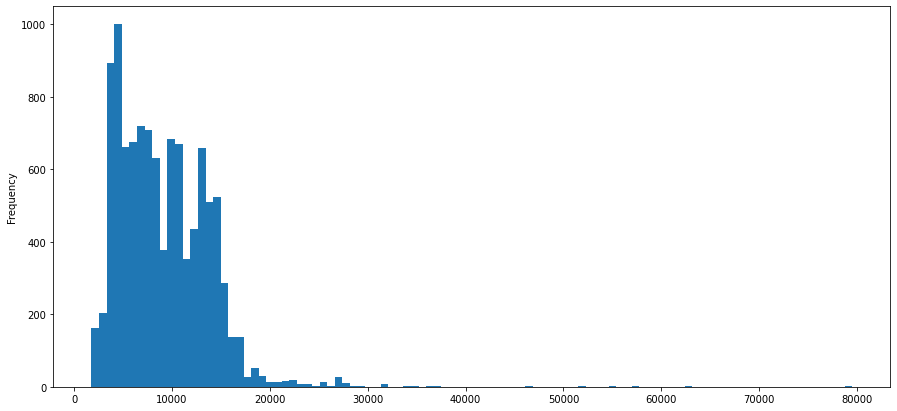

In [21]:
df['Price'].plot(kind='hist', figsize=(15, 7), bins=100)

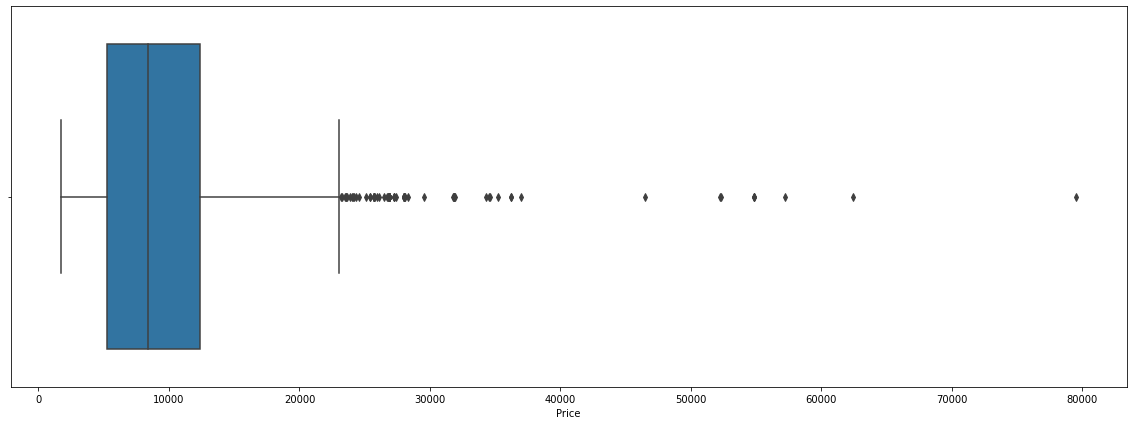

In [22]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=df, x='Price')
plt.show()

In [23]:
df['Additional_Info'].unique()

array(['Null ', 'Null', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
df['Additional_Info'].value_counts()

Null                            8346
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Null                               1
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [25]:
df.loc[df['Price']>40000, :]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Is_Weekend,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_,Arrival_Time_Hour,Arrival_Time_Minute,Total_Departure_Time,Total_Arrival_Time,Dep_Type_of_Day,Arr_Type_of_Day
657,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,"[05, 45]",10:45,300,1 stop,Null,...,0,05,45,"[10, 45]",10,45,0545,1045,None,None
1478,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,"[18, 40]",00:45,365,1 stop,Null,...,0,18,40,"[00, 45]",00,45,1840,0045,None,None
2618,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,"[22, 50]",05:05,375,1 stop,Null,...,0,22,50,"[05, 05]",05,05,2250,0505,None,None
2924,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,"[05, 45]",11:25,340,1 stop,Business class,...,0,05,45,"[11, 25]",11,25,0545,1125,None,None
5372,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,"[05, 45]",12:25,400,1 stop,Business class,...,0,05,45,"[12, 25]",12,25,0545,1225,None,None
5439,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,"[16, 55]",23:00,365,1 stop,Null,...,0,16,55,"[23, 00]",23,00,1655,2300,None,None
7351,Jet Airways Business,2019-03-03,Delhi,Cochin,DEL → ATQ → BOM → COK,"[20, 05]",04:25,500,2 stops,Null,...,1,20,05,"[04, 25]",04,25,2005,0425,None,None
9715,Jet Airways Business,2019-03-06,Delhi,Cochin,DEL → ATQ → BOM → COK,"[20, 05]",04:25,500,2 stops,Null,...,0,20,05,"[04, 25]",04,25,2005,0425,None,None
10364,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,"[09, 45]",14:25,280,1 stop,Business class,...,0,09,45,"[14, 25]",14,25,0945,1425,None,None


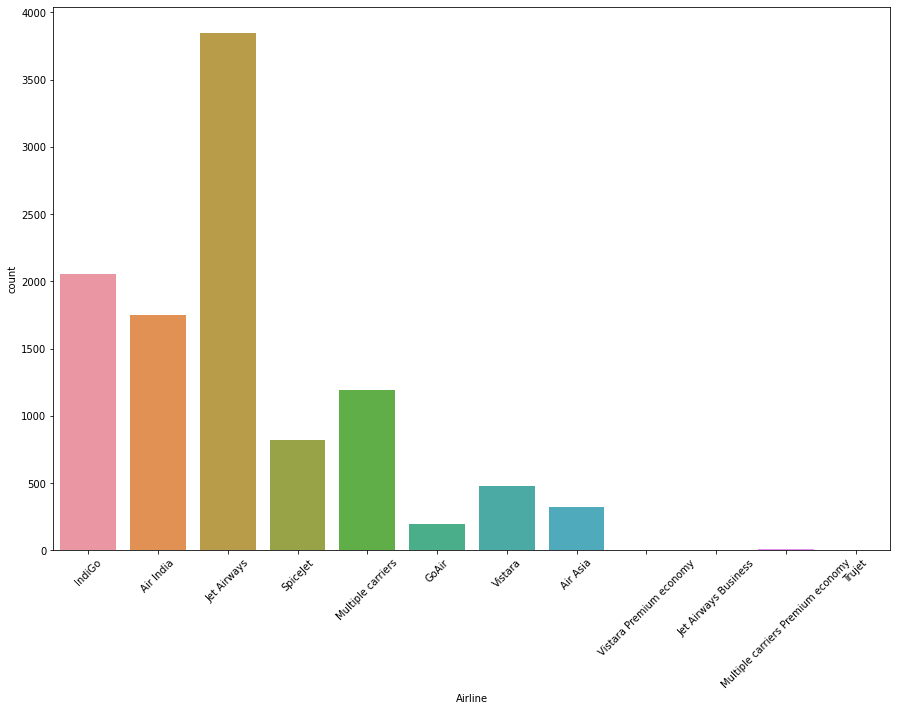

In [26]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Airline')
plt.xticks(rotation=45)
plt.show()

In [27]:
economical_flights = df.query("Price > 0 and Price <= 10000")
premium_economy_flights = df.query("Price > 10000 and Price <= 25000")
first_class_flights = df.query("Price > 25000")

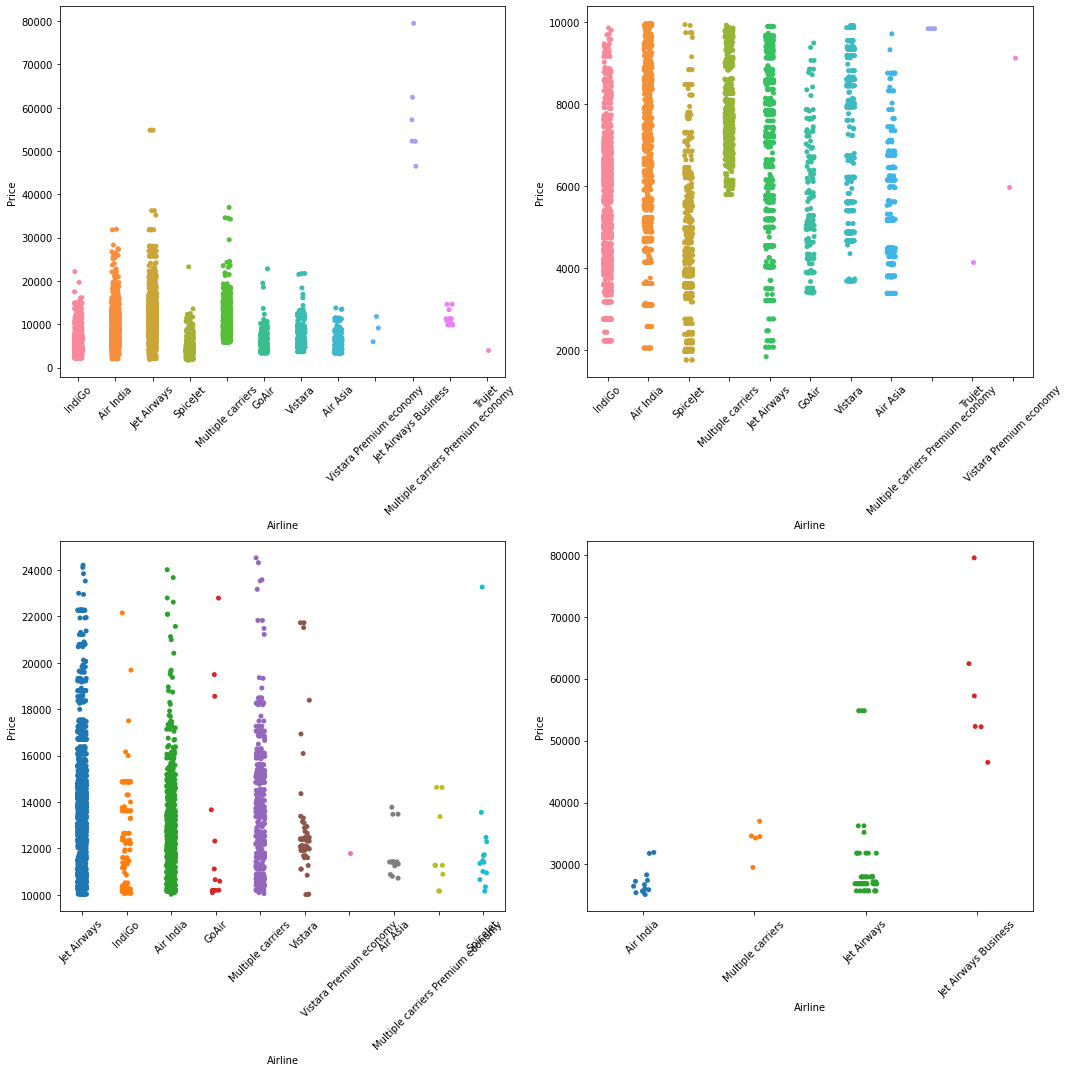

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.stripplot(data=df, x='Airline', y='Price', ax=ax[0][0])
ax[0][0].set_xticklabels(labels=df['Airline'].unique(), rotation=45)

sns.stripplot(data=economical_flights, x='Airline', y='Price', ax=ax[0][1])
ax[0][1].set_xticklabels(labels=economical_flights['Airline'].unique(), rotation=45)

sns.stripplot(data=premium_economy_flights, x='Airline', y='Price', ax=ax[1][0])
ax[1][0].set_xticklabels(labels=premium_economy_flights['Airline'].unique(), rotation=45)

sns.stripplot(data=first_class_flights, x='Airline', y='Price', ax=ax[1][1])
ax[1][1].set_xticklabels(labels=first_class_flights['Airline'].unique(), rotation=45)

plt.tight_layout()
plt.show()

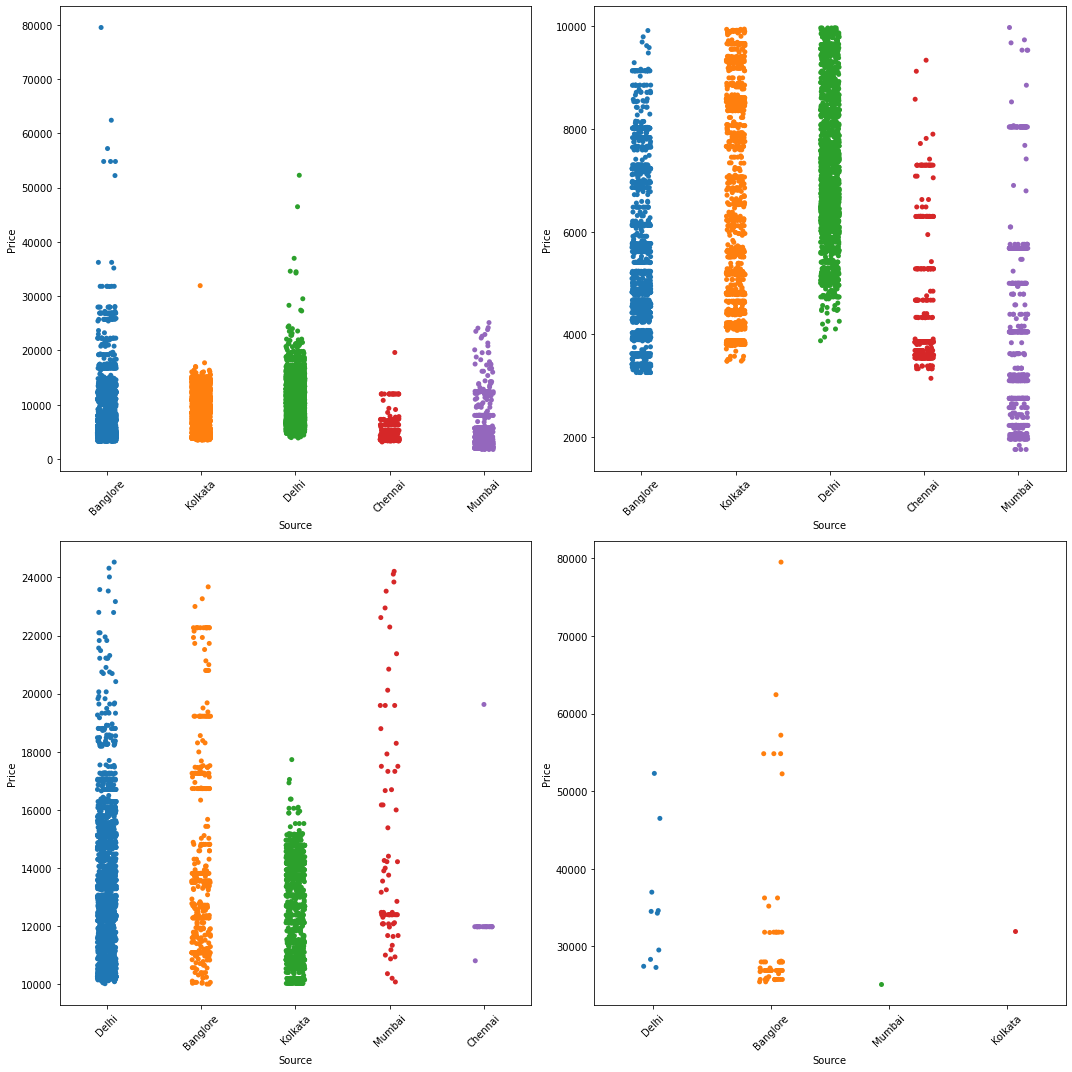

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.stripplot(data=df, x='Source', y='Price', ax=ax[0][0])
ax[0][0].set_xticklabels(labels=df['Source'].unique(), rotation=45)

sns.stripplot(data=economical_flights, x='Source', y='Price', ax=ax[0][1])
ax[0][1].set_xticklabels(labels=economical_flights['Source'].unique(), rotation=45)

sns.stripplot(data=premium_economy_flights, x='Source', y='Price', ax=ax[1][0])
ax[1][0].set_xticklabels(labels=premium_economy_flights['Source'].unique(), rotation=45)

sns.stripplot(data=first_class_flights, x='Source', y='Price', ax=ax[1][1])
ax[1][1].set_xticklabels(labels=first_class_flights['Source'].unique(), rotation=45)

plt.tight_layout()
plt.show()

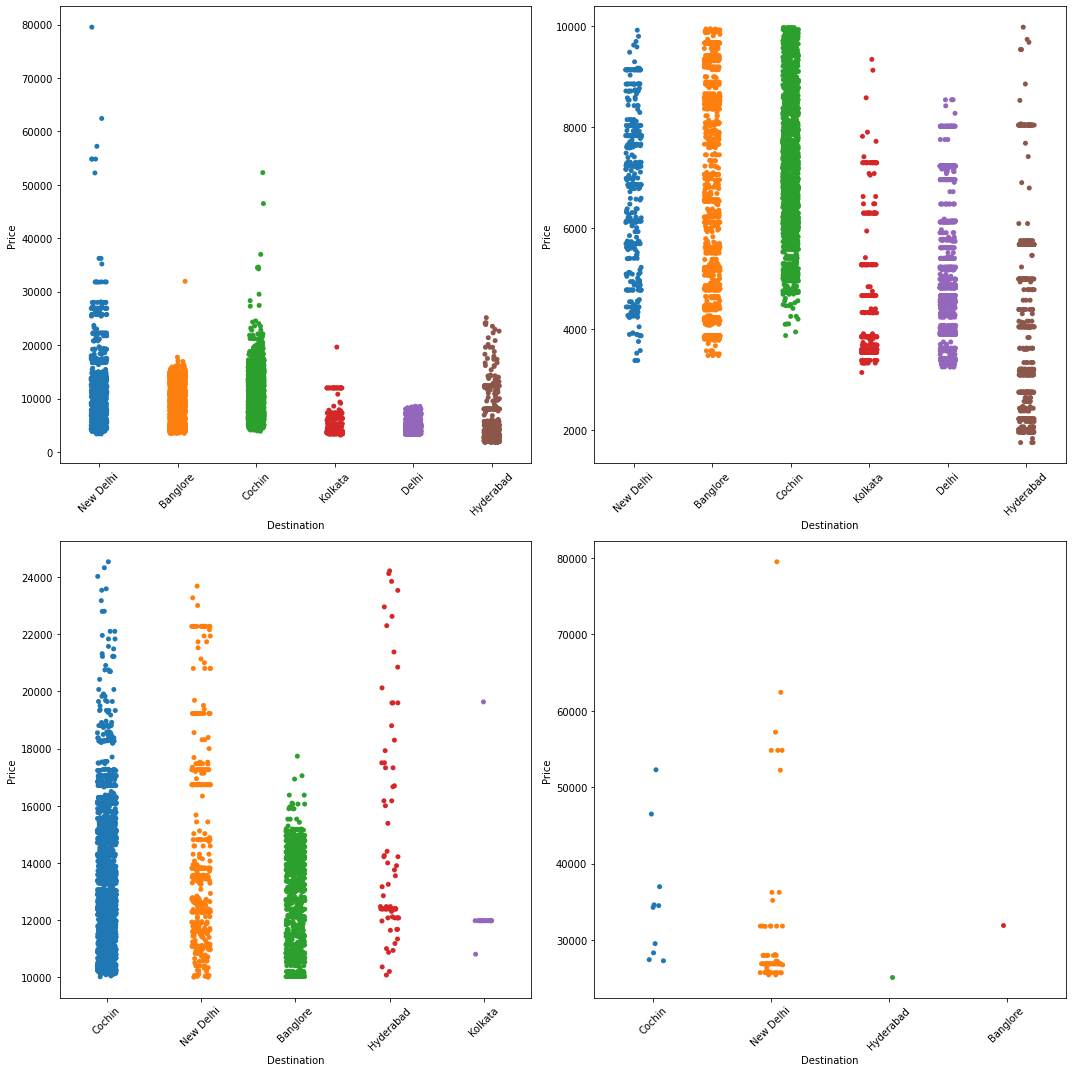

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.stripplot(data=df, x='Destination', y='Price', ax=ax[0][0])
ax[0][0].set_xticklabels(labels=df['Destination'].unique(), rotation=45)

sns.stripplot(data=economical_flights, x='Destination', y='Price', ax=ax[0][1])
ax[0][1].set_xticklabels(labels=economical_flights['Destination'].unique(), rotation=45)

sns.stripplot(data=premium_economy_flights, x='Destination', y='Price', ax=ax[1][0])
ax[1][0].set_xticklabels(labels=premium_economy_flights['Destination'].unique(), rotation=45)

sns.stripplot(data=first_class_flights, x='Destination', y='Price', ax=ax[1][1])
ax[1][1].set_xticklabels(labels=first_class_flights['Destination'].unique(), rotation=45)

plt.tight_layout()
plt.show()

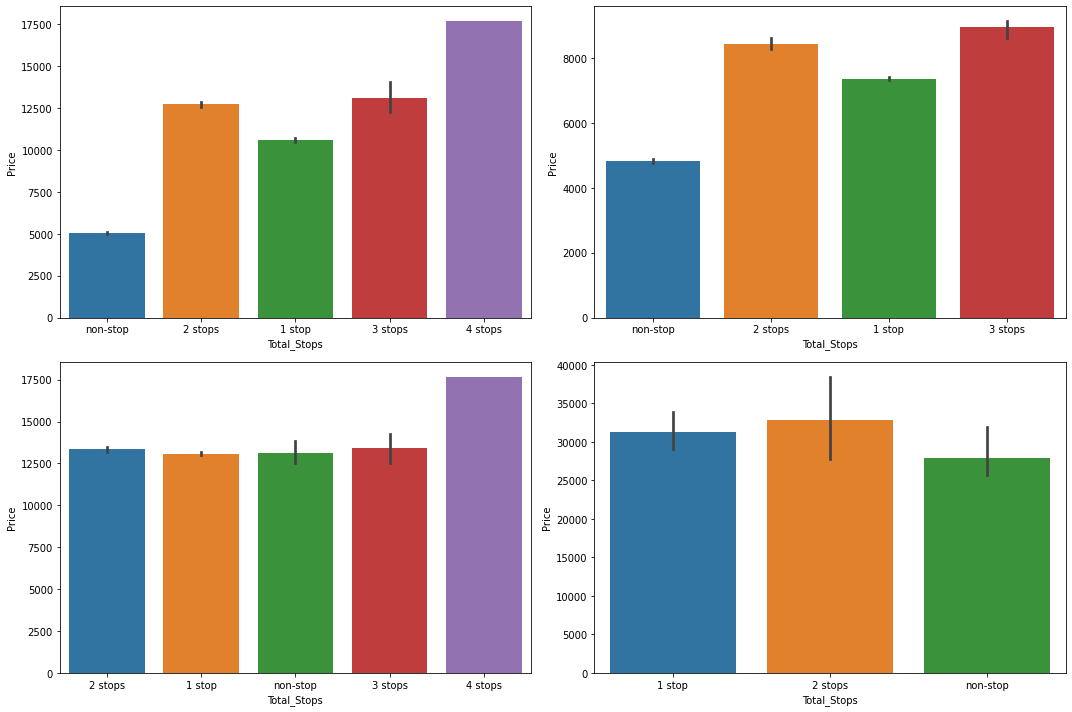

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(data=df, x='Total_Stops', y='Price', ax=ax[0][0])
sns.barplot(data=economical_flights, x='Total_Stops', y='Price', ax=ax[0][1], label='Economical Flight Total Stops')
sns.barplot(data=premium_economy_flights, x='Total_Stops', y='Price', ax=ax[1][0], label='Premium Economy Flight Total Stops')
sns.barplot(data=first_class_flights, x='Total_Stops', y='Price', ax=ax[1][1], label='Expensive Flight Total Stops')
plt.tight_layout()
plt.show()

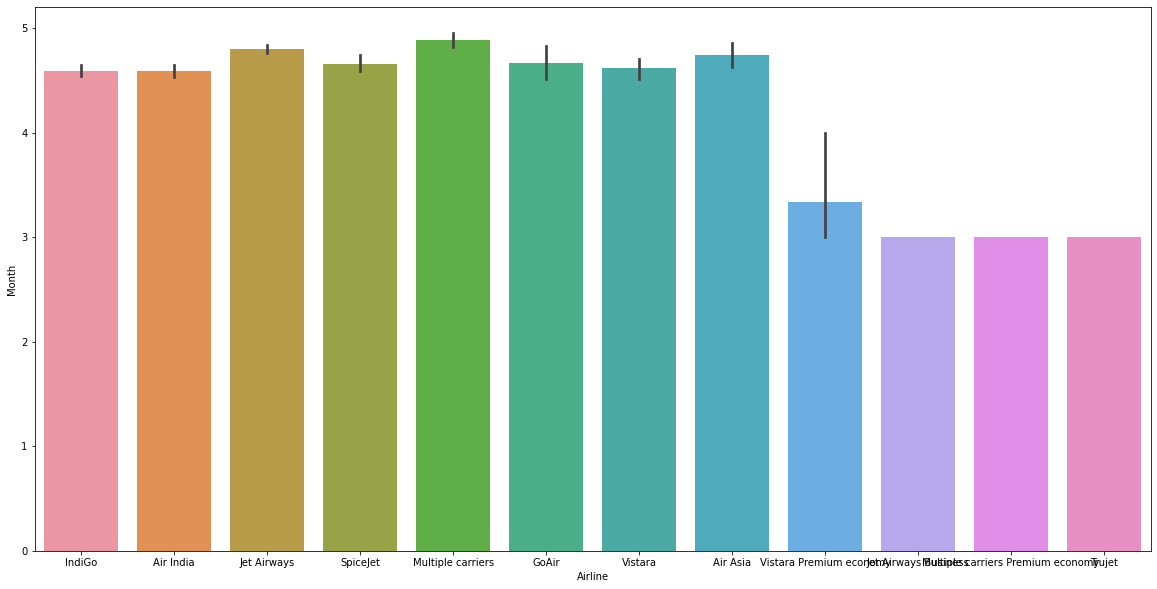

In [32]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='Airline', y='Month')
plt.show()

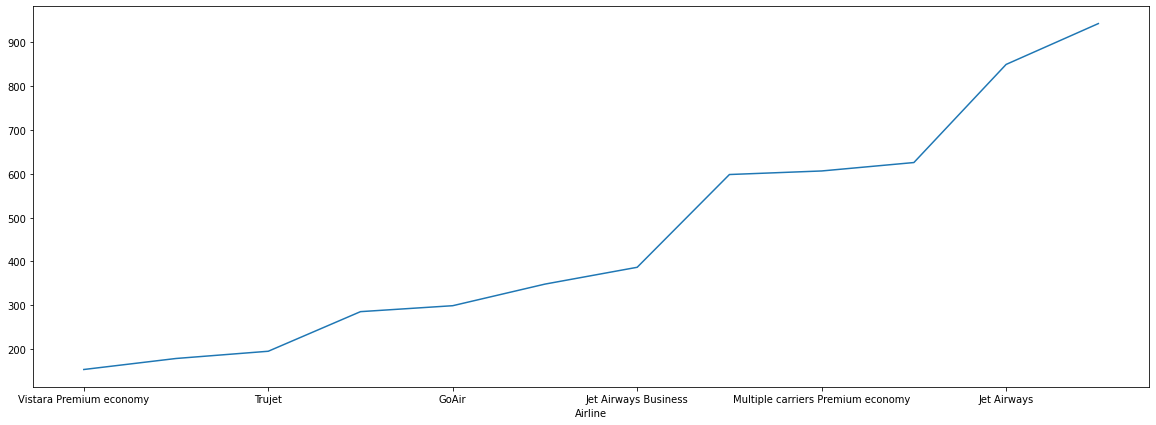

In [33]:
df.groupby('Airline')['Duration'].mean().sort_values().plot(figsize=(20, 7))
plt.show()

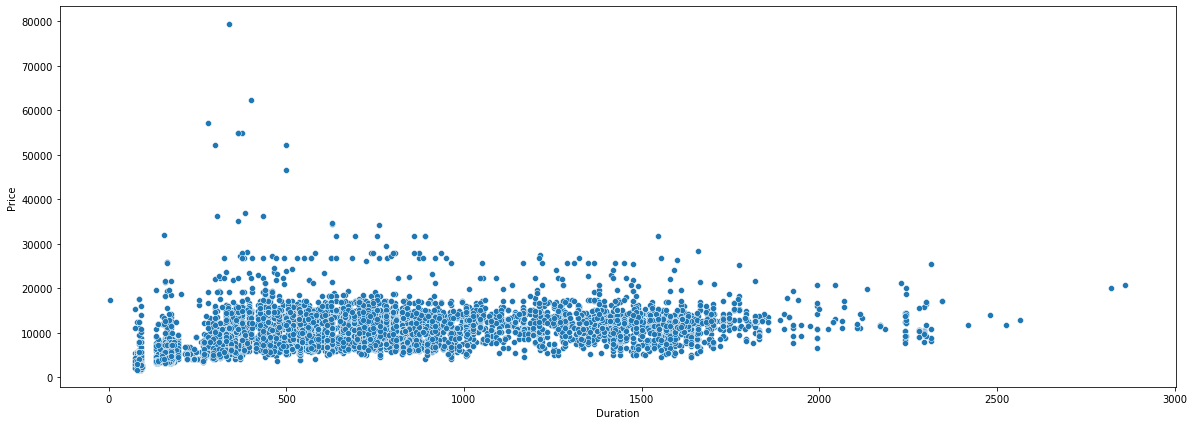

In [34]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=df, x='Duration', y='Price')
plt.show()

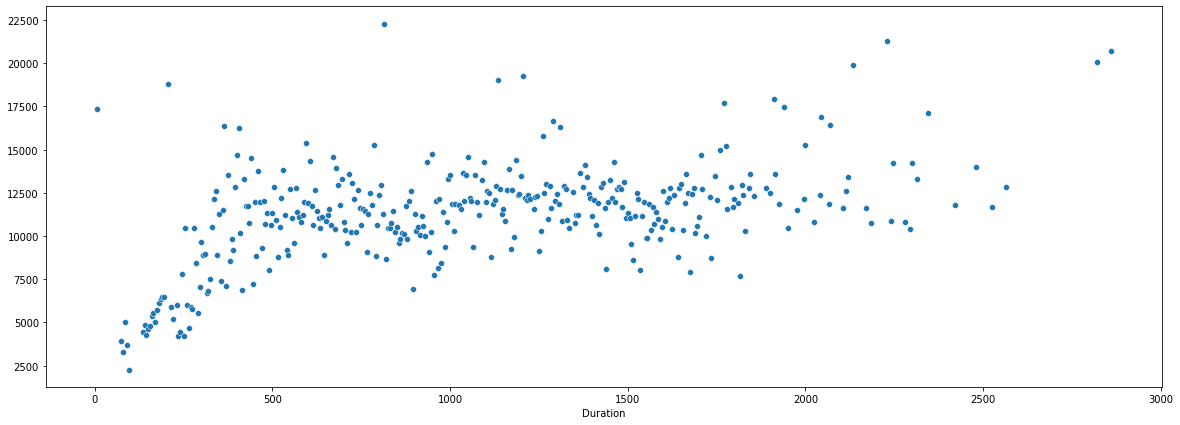

In [35]:
avg_price_duration = df.groupby('Duration')['Price'].mean()

plt.figure(figsize=(20, 7))
sns.scatterplot(data=avg_price_duration, x=avg_price_duration.index, y=avg_price_duration.values)
plt.show()

In [36]:
pd.pivot_table(data=df, index='Airline', columns='Month', values='Price')

Month,3,4,5,6
Airline,,,,
Air Asia,5988.016667,4729.362069,5174.346154,6304.917526
Air India,10699.747170,6250.581081,9784.507666,9242.598765
GoAir,8124.275000,4953.431818,5812.220000,5058.533333
IndiGo,7212.329806,4779.929712,5229.685053,5112.076923
Jet Airways,13414.112598,7578.851852,11665.133767,11243.904542
Jet Airways Business,58358.666667,NaN,NaN,NaN
Multiple carriers,12709.386581,8617.187500,10151.741047,10394.063492
Multiple carriers Premium economy,11418.846154,NaN,NaN,NaN
SpiceJet,5322.122905,4248.403846,4060.429150,3942.288136


In [37]:
pd.pivot_table(data=df, index='Airline', columns='Season', values='Price')

Season,2,3
Airline,,
Air Asia,5278.000000,6304.917526
Air India,9754.512253,9242.598765
GoAir,6220.395522,5058.533333
IndiGo,5911.644938,5112.076923
Jet Airways,11847.697647,11243.904542
Jet Airways Business,58358.666667,NaN
Multiple carriers,11273.114162,10394.063492
Multiple carriers Premium economy,11418.846154,NaN
SpiceJet,4498.860825,3942.288136


In [67]:
monthly_price = df.groupby(['Month', 'Airline'])['Price'].mean().reset_index()
monthly_price

,Month,Airline,Price
0,3,Air Asia,5988.016667
1,3,Air India,10699.747170
2,3,GoAir,8124.275000
3,3,IndiGo,7212.329806
4,3,Jet Airways,13414.112598
5,3,Jet Airways Business,58358.666667
6,3,Multiple carriers,12709.386581
7,3,Multiple carriers Premium economy,11418.846154
8,3,SpiceJet,5322.122905
9,3,Trujet,4140.000000


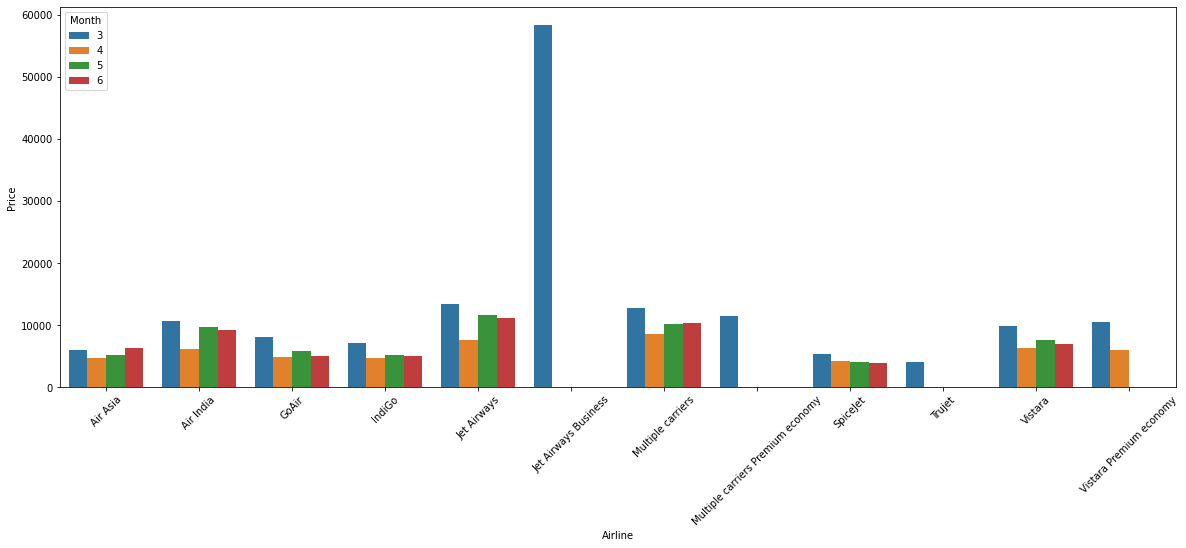

In [68]:
plt.figure(figsize=(20, 7))
sns.barplot(data=monthly_price, x='Airline', y='Price', hue='Month')
plt.xticks(rotation=45)
plt.show()

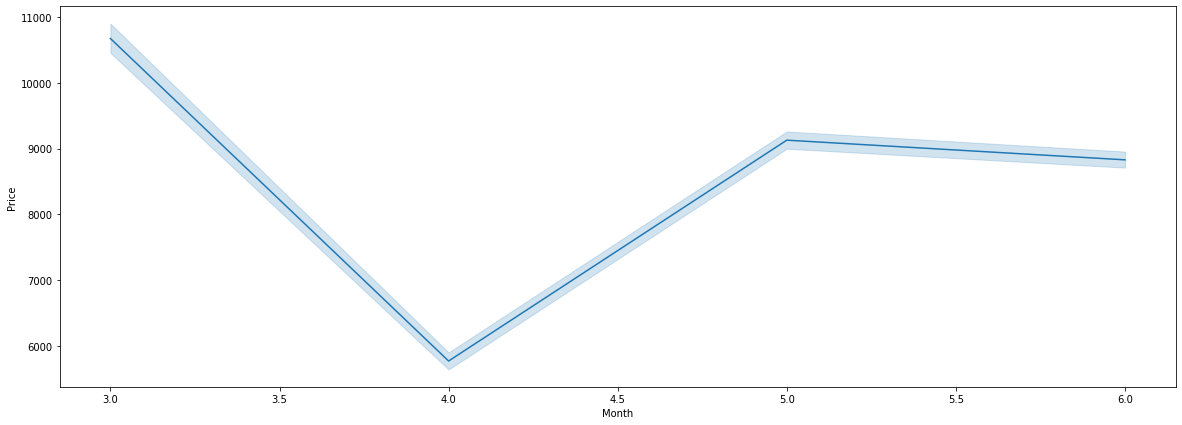

In [55]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x='Month', y='Price')
plt.show()

In [38]:
seasonal_price = df.groupby(['Season', 'Airline'])['Price'].mean().reset_index()
seasonal_price

,Season,Airline,Price
0,2,Air Asia,5278.000000
1,2,Air India,9754.512253
2,2,GoAir,6220.395522
3,2,IndiGo,5911.644938
4,2,Jet Airways,11847.697647
5,2,Jet Airways Business,58358.666667
6,2,Multiple carriers,11273.114162
7,2,Multiple carriers Premium economy,11418.846154
8,2,SpiceJet,4498.860825
9,2,Trujet,4140.000000


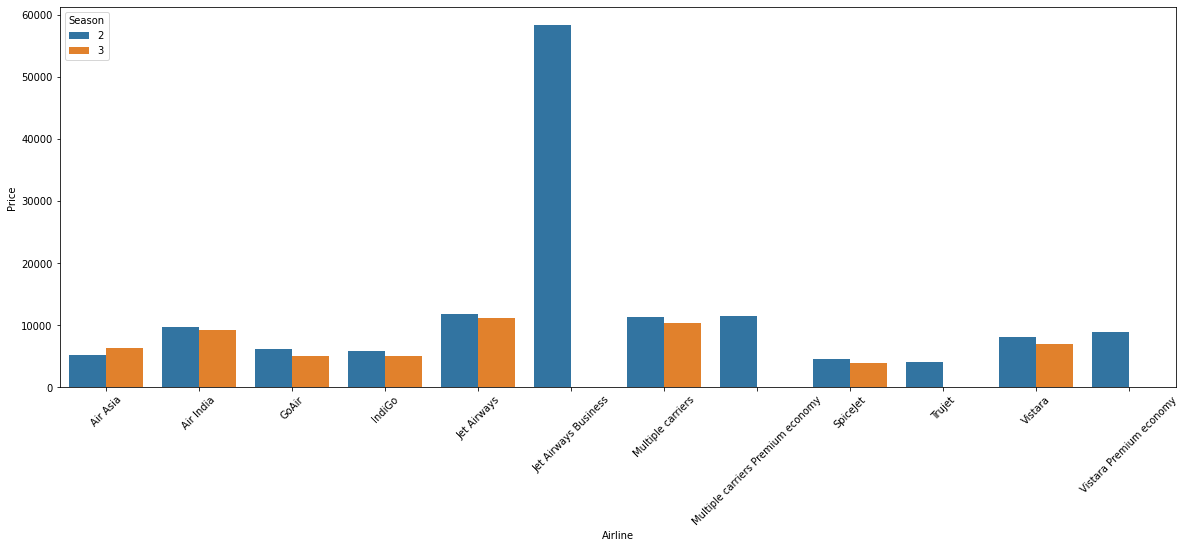

In [66]:
plt.figure(figsize=(20, 7))
sns.barplot(data=seasonal_price, x='Airline', y='Price', hue='Season')
plt.xticks(rotation=45)
plt.show()

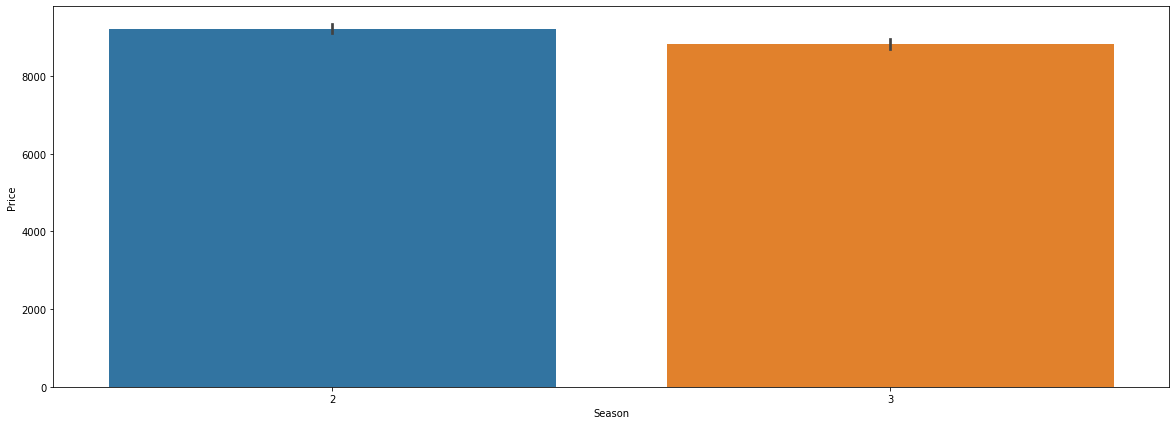

In [57]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='Season', y='Price')
plt.show()

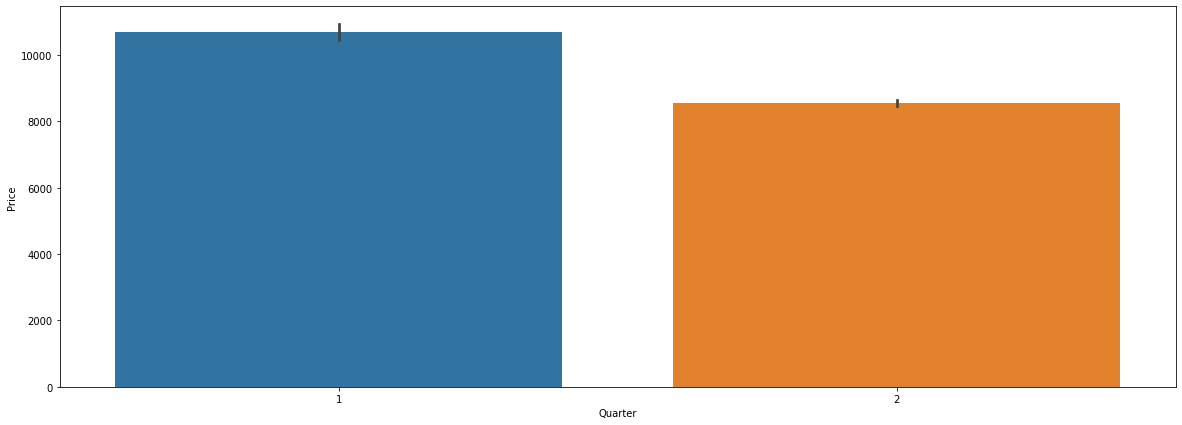

In [58]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='Quarter', y='Price')
plt.show()

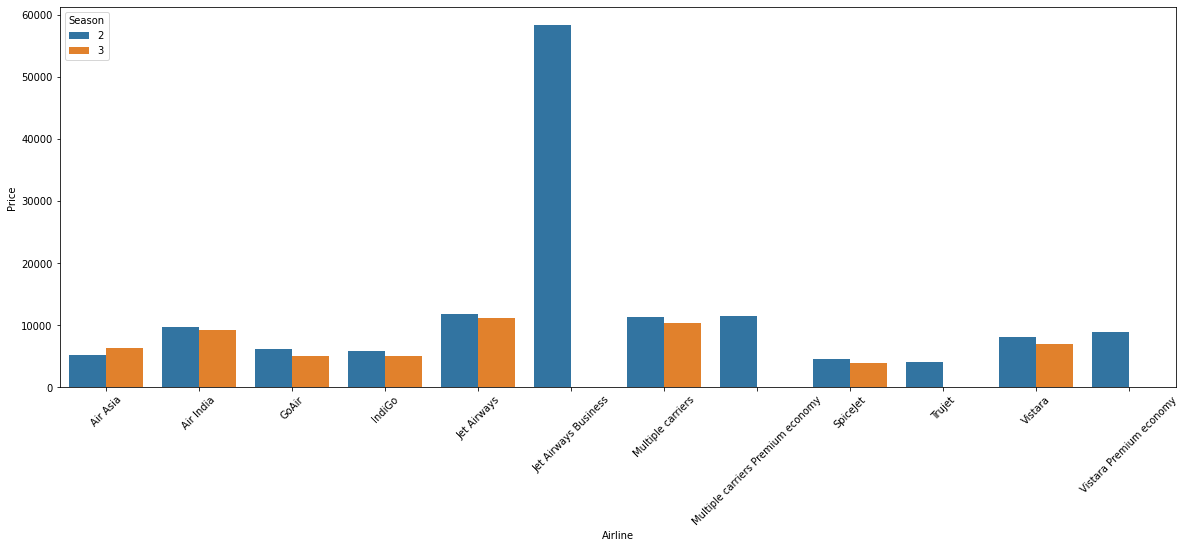

In [39]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(data=seasonal_price, x='Airline', y='Price', hue='Season', ax=ax)
ax.set_xticklabels(labels=seasonal_price['Airline'].unique(), rotation=45)
plt.show()

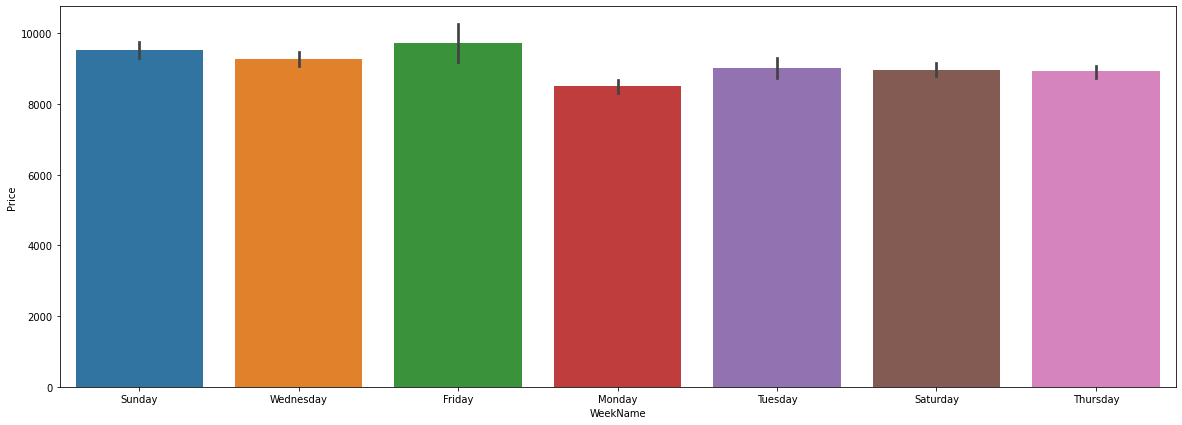

In [40]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='WeekName', y='Price')
plt.show()

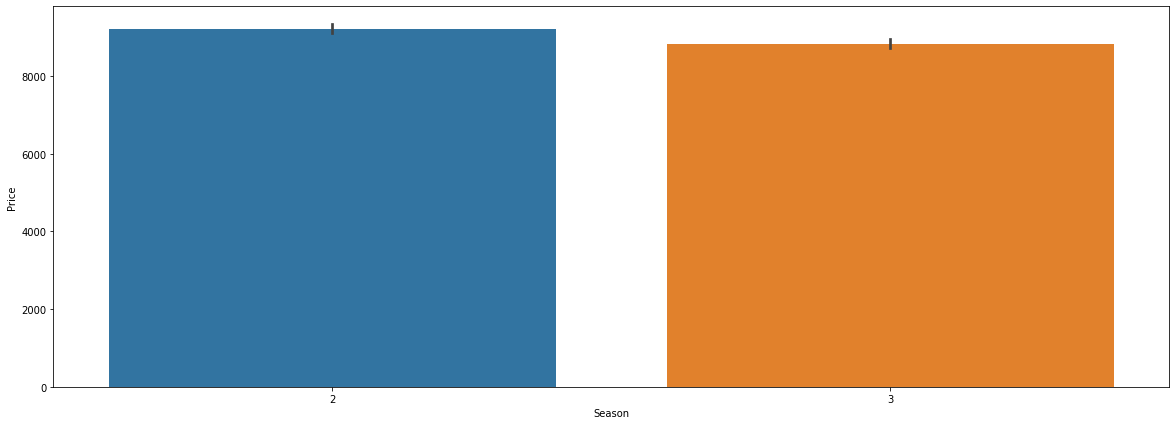

In [41]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='Season', y='Price')
plt.show()

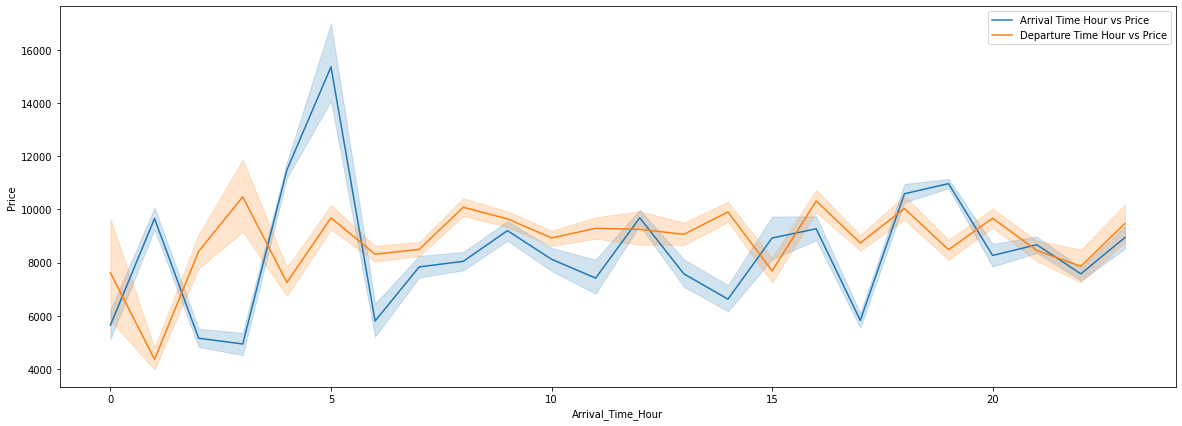

In [53]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x='Arrival_Time_Hour', y='Price', label='Arrival Time Hour vs Price')
sns.lineplot(data=df, x='Dep_Time_Hour', y='Price', label='Departure Time Hour vs Price')
plt.show()

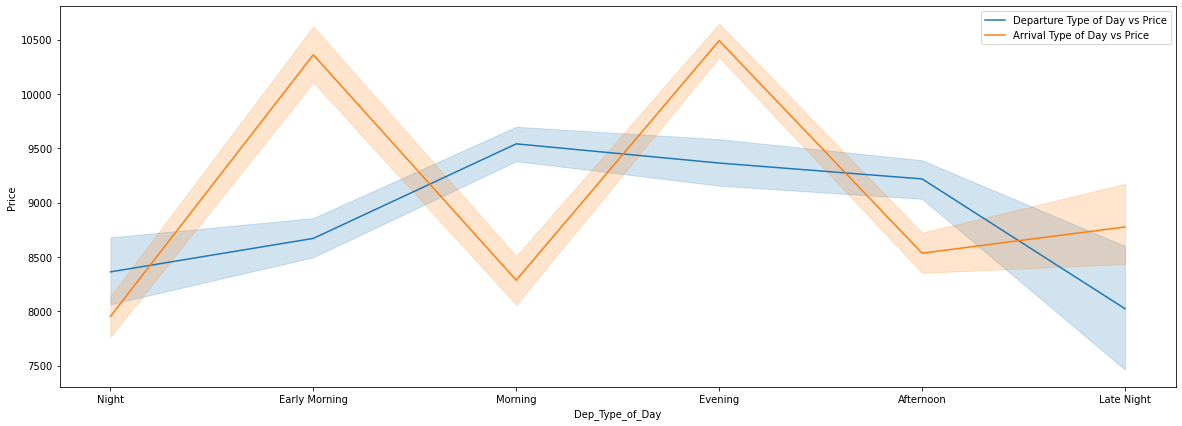

In [52]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x='Dep_Type_of_Day', y='Price', label='Departure Type of Day vs Price')
sns.lineplot(data=df, x='Arr_Type_of_Day', y='Price', label='Arrival Type of Day vs Price')
plt.show()

<Figure size 1440x504 with 0 Axes>

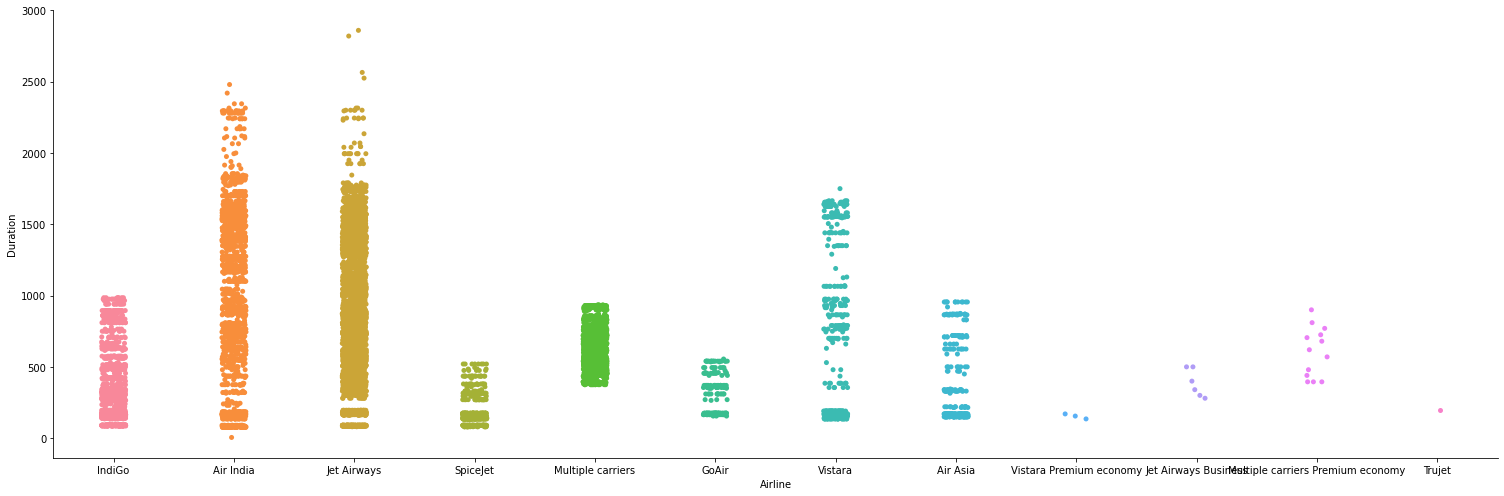

In [44]:
plt.figure(figsize=(20, 7))
sns.catplot(data=df, y='Duration', x='Airline', height=7, aspect=3)
plt.show()

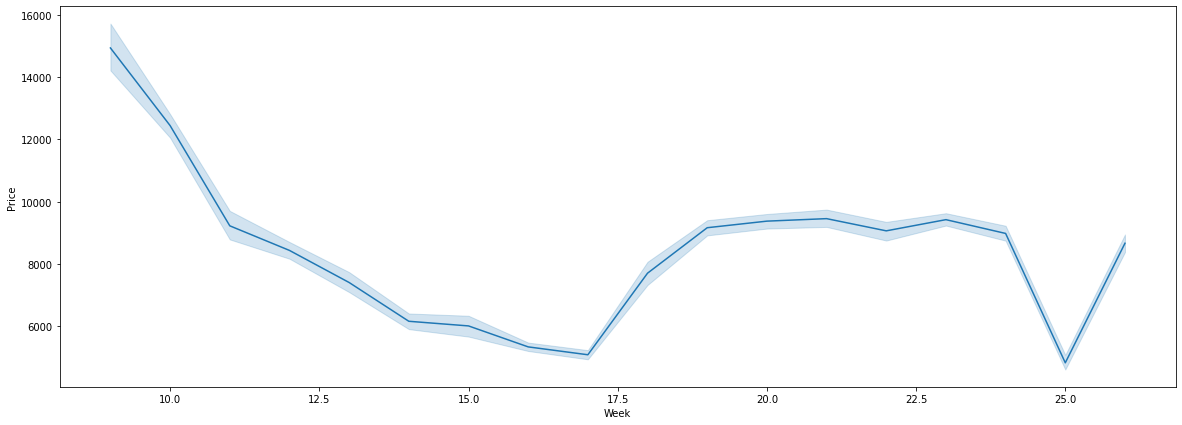

In [73]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x='Week', y='Price')
plt.show()

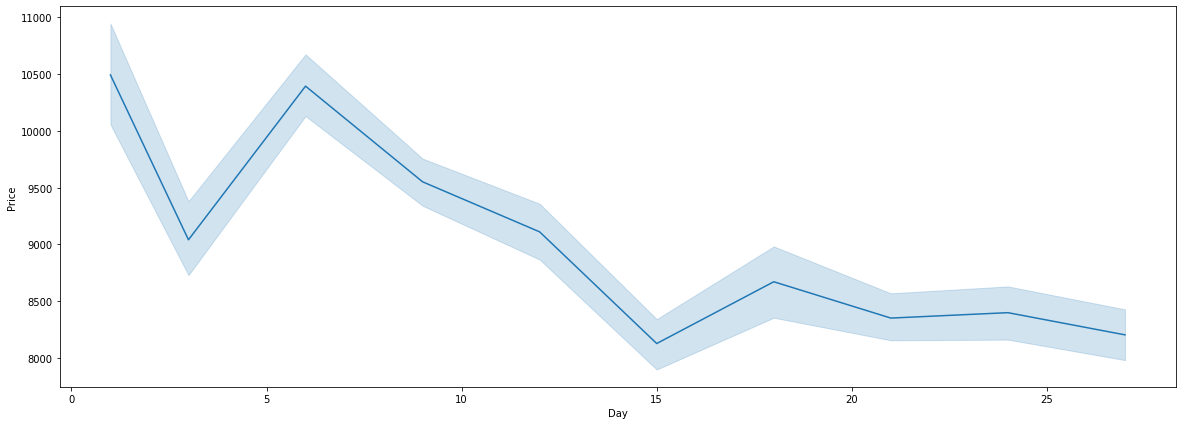

In [74]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x='Day', y='Price')
plt.show()

In [115]:
pd.set_option('display.max_columns', 29)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Day,Week,Month,Quarter,Year,WeekName,Season,Is_Weekday,Is_Weekend,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Type_of_Day,Arr_Type_of_Day,City1,City2,City3,City4,City5,City6
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",170,0,3897,24,12,3,1,2019,Sunday,2,0,1,22,20,1,10,Night,Late Night,BLR,DEL,None,None,None,None
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",445,2,7662,1,18,5,2,2019,Wednesday,2,1,0,5,50,13,15,Early Morning,Afternoon,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",1140,2,13882,9,23,6,2,2019,Sunday,3,0,1,9,25,4,25,Morning,Early Morning,DEL,LKO,BOM,COK,None,None
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",325,1,6218,12,19,5,2,2019,Sunday,2,0,1,18,5,23,30,Evening,Night,CCU,NAG,BLR,None,None,None
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",285,1,13302,1,9,3,1,2019,Friday,2,1,0,16,50,21,35,Afternoon,Night,BLR,NAG,DEL,None,None,None


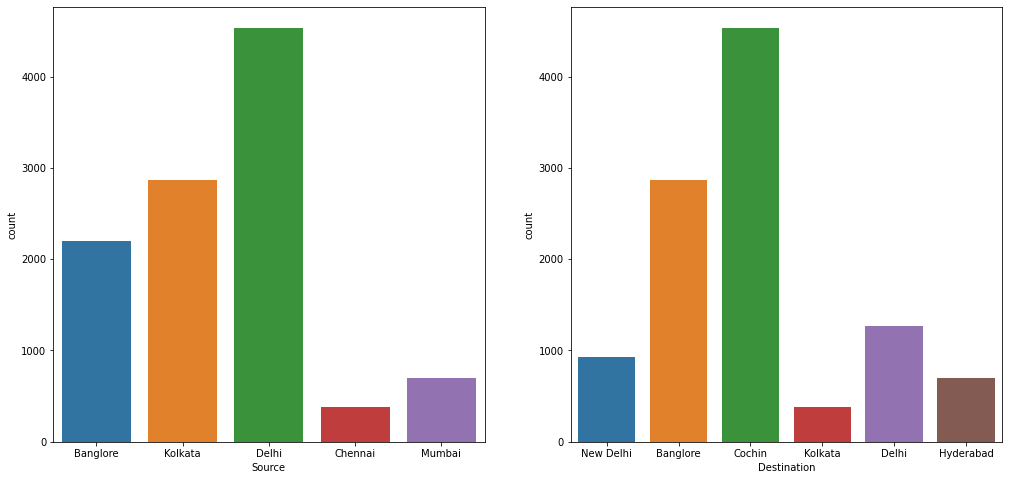

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.countplot(data=df, x='Source', ax=ax[0])
sns.countplot(data=df, x='Destination', ax=ax[1])
plt.show()

In [86]:
df['Route'] = df['Route'].str.split('→')
df['City1'] = df['Route'].str[0]
df['City2'] = df['Route'].str[1]
df['City3'] = df['Route'].str[2]
df['City4'] = df['Route'].str[3]
df['City5'] = df['Route'].str[4]
df['City6'] = df['Route'].str[5]

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Airline               10682 non-null  object        
 1   Date_of_Journey       10682 non-null  datetime64[ns]
 2   Source                10682 non-null  object        
 3   Destination           10682 non-null  object        
 4   Route                 10682 non-null  object        
 5   Dep_Time              10682 non-null  object        
 6   Arrival_Time          10682 non-null  object        
 7   Duration              10682 non-null  int64         
 8   Total_Stops           10682 non-null  object        
 9   Additional_Info       10682 non-null  object        
 10  Price                 10682 non-null  int64         
 11  Day                   10682 non-null  int64         
 12  Week                  10682 non-null  UInt32        
 13  Month           

In [96]:
df['City3'].fillna('None', axis=0, inplace=True)
df['City4'].fillna('None', axis=0, inplace=True)
df['City5'].fillna('None', axis=0, inplace=True)
df['City6'].fillna('None', axis=0, inplace=True)

In [113]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']
cat_cols

['Airline',
 'Source',
 'Destination',
 'Route',
 'WeekName',
 'Dep_Type_of_Day',
 'Arr_Type_of_Day',
 'City1',
 'City2',
 'City3',
 'City4',
 'City5',
 'City6']

In [114]:
categorical_df = df[cat_cols]
categorical_df

,Airline,Source,Destination,Route,WeekName,Dep_Type_of_Day,Arr_Type_of_Day,City1,City2,City3,City4,City5,City6
0,IndiGo,Banglore,New Delhi,"[BLR , DEL]",Sunday,Night,Late Night,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",Wednesday,Early Morning,Afternoon,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,"[DEL , LKO , BOM , COK]",Sunday,Morning,Early Morning,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,"[CCU , NAG , BLR]",Sunday,Evening,Night,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,"[BLR , NAG , DEL]",Friday,Afternoon,Night,BLR,NAG,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,"[CCU , BLR]",Tuesday,Evening,Night,CCU,BLR,None,None,None,None
10679,Air India,Kolkata,Banglore,"[CCU , BLR]",Saturday,Evening,Night,CCU,BLR,None,None,None,None
10680,Jet Airways,Banglore,Delhi,"[BLR , DEL]",Saturday,Morning,Morning,BLR,DEL,None,None,None,None
10681,Vistara,Banglore,New Delhi,"[BLR , DEL]",Friday,Morning,Afternoon,BLR,DEL,None,None,None,None


In [100]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [101]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [103]:
df['Total_Stops'] = df['Total_Stops'].astype('int64')

In [104]:
df['Arrival_Time_Minute'] = df['Arrival_Time_Minute'].astype('int64')
df['Dep_Time_Minute'] = df['Dep_Time_Minute'].astype('int64')

In [108]:
df.drop(['Dep_Time', 'Arrival_Time', 'Additional_Info', 'Arrival_Time_'], axis=1, inplace=True)

In [112]:
df.drop(['Total_Departure_Time', 'Total_Arrival_Time'], axis=1, inplace=True)

In [244]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Day,Week,Month,Quarter,Year,WeekName,Season,Is_Weekday,Is_Weekend,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Type_of_Day,Arr_Type_of_Day,City1,City2,City3,City4,City5,City6
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",170,0,3897,24,12,3,1,2019,Sunday,2,0,1,22,20,1,10,Night,Late Night,BLR,DEL,None,None,None,None
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",445,2,7662,1,18,5,2,2019,Wednesday,2,1,0,5,50,13,15,Early Morning,Afternoon,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",1140,2,13882,9,23,6,2,2019,Sunday,3,0,1,9,25,4,25,Morning,Early Morning,DEL,LKO,BOM,COK,None,None
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",325,1,6218,12,19,5,2,2019,Sunday,2,0,1,18,5,23,30,Evening,Night,CCU,NAG,BLR,None,None,None
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",285,1,13302,1,9,3,1,2019,Friday,2,1,0,16,50,21,35,Afternoon,Night,BLR,NAG,DEL,None,None,None


In [246]:
df['Duration_Hours'] = df['Duration'] / 60

In [249]:
df['Duration_Hours'].describe()

count    10682.000000
mean        10.717008
std          8.463836
min          0.083333
25%          2.833333
50%          8.666667
75%         15.500000
max         47.666667
Name: Duration_Hours, dtype: float64

In [305]:
df.loc[df['Duration_Hours']<1, :]

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Day,Week,Month,Quarter,Year,WeekName,Season,Is_Weekday,Is_Weekend,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Type_of_Day,Arr_Type_of_Day,City1,City2,City3,City4,City5,City6,Duration_Hours


In [304]:
df.drop(6474, axis=0, inplace=True)

In [258]:
df.loc[(df['Duration_Hours']<2.83333) & (df['Total_Stops']==0), ['Price']].describe()

,Price
count,2135.000000
mean,4646.877283
std,2166.269738
min,1759.000000
25%,3597.000000
50%,4174.000000
75%,5198.000000
max,31945.000000


In [259]:
df.loc[(df['Duration_Hours']>=2.83333) & (df['Total_Stops']>0), ['Price']].describe()

,Price
count,7189.000000
mean,11058.339129
std,4194.498746
min,3480.000000
25%,8067.000000
50%,10844.000000
75%,13542.000000
max,79512.000000


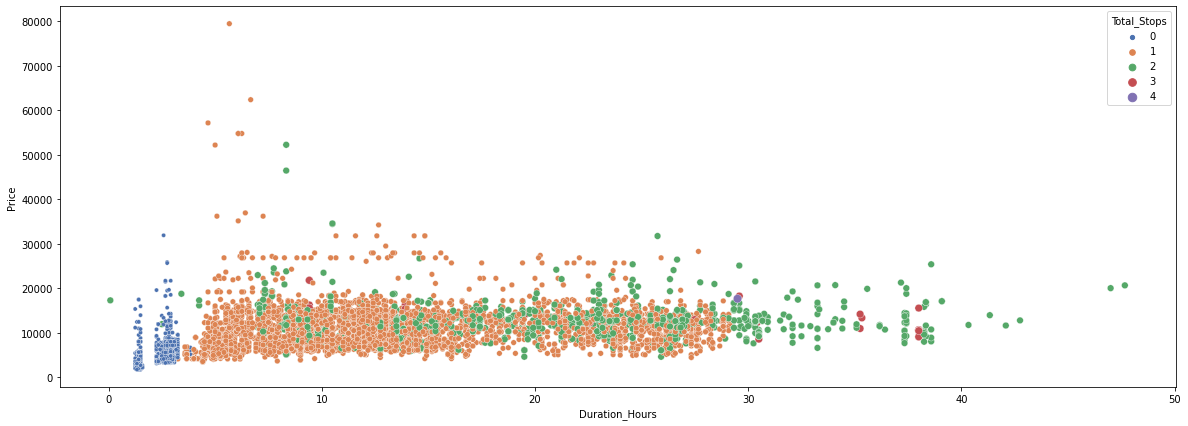

In [267]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=df, x='Duration_Hours', y='Price', hue='Total_Stops', size='Total_Stops', palette='deep')
plt.show()

In [288]:
airline_time_of_day = df.groupby(['Airline', 'Dep_Type_of_Day'])['Price'].mean().sort_values()
airline_time_of_day

Airline                            Dep_Type_of_Day
SpiceJet                           Night               3521.028369
                                   Early Morning       3939.361582
Trujet                             Afternoon           4140.000000
Air Asia                           Morning             4185.648148
SpiceJet                           Afternoon           4454.837209
Air Asia                           Night               4786.930556
GoAir                              Evening             4867.387097
SpiceJet                           Morning             4893.354015
IndiGo                             Night               5017.391753
GoAir                              Morning             5060.545455
SpiceJet                           Evening             5128.727273
IndiGo                             Evening             5146.971014
                                   Late Night          5292.194175
GoAir                              Early Morning       5333.262500
IndiGo     

In [289]:
airline_time_of_day = df.groupby(['Airline', 'Arr_Type_of_Day'])['Price'].mean().sort_values()
airline_time_of_day

Airline                            Arr_Type_of_Day
SpiceJet                           Early Morning       2644.400000
                                   Afternoon           4139.552632
Trujet                             Afternoon           4140.000000
SpiceJet                           Morning             4199.473469
                                   Night               4458.578431
Air Asia                           Late Night          4534.206349
GoAir                              Morning             4787.818182
Air Asia                           Afternoon           4925.591549
IndiGo                             Evening             4999.717391
                                   Early Morning       5019.415525
SpiceJet                           Evening             5165.503597
GoAir                              Afternoon           5261.120000
IndiGo                             Morning             5447.620690
Air Asia                           Evening             5739.000000
IndiGo     

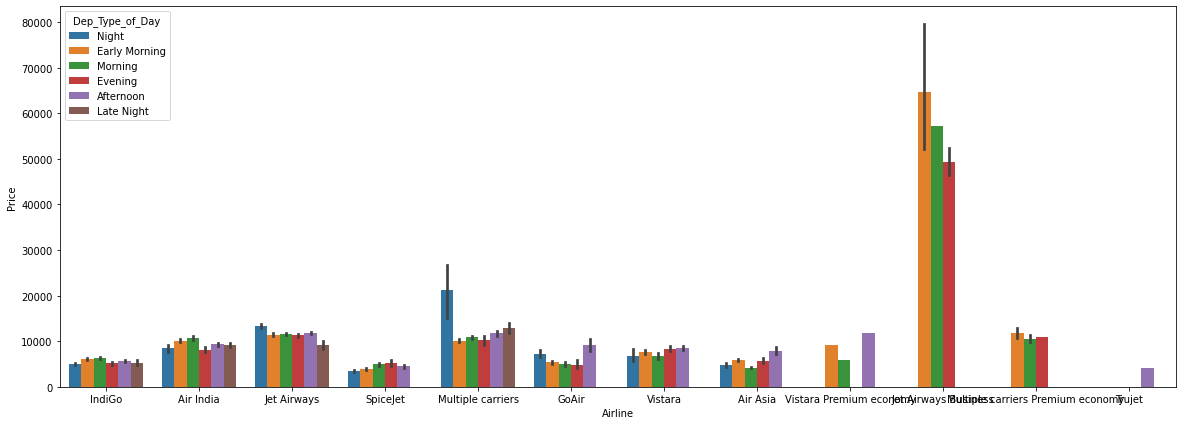

In [270]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='Airline', y='Price', hue='Dep_Type_of_Day')
plt.show()

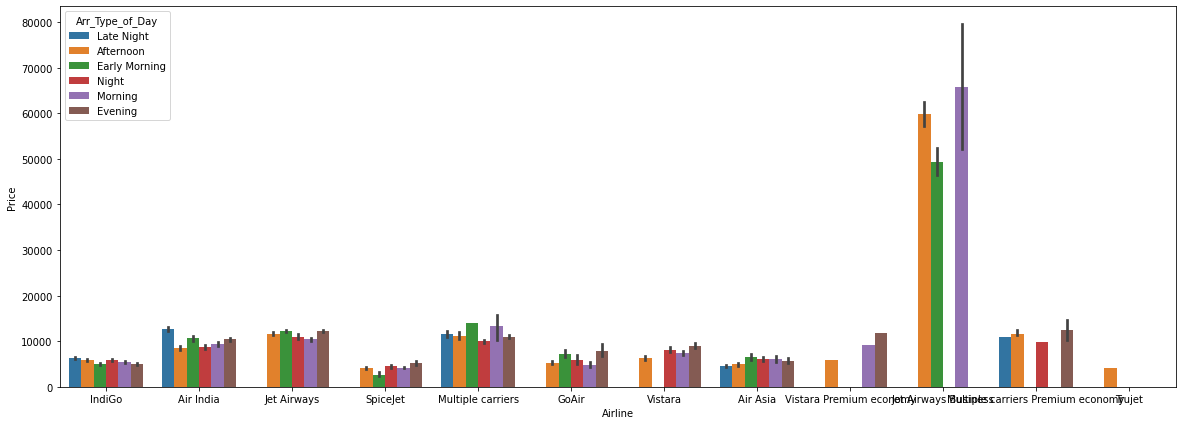

In [271]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='Airline', y='Price', hue='Arr_Type_of_Day')
plt.show()

In [311]:
df.groupby(['Airline', 'Source', 'Destination'])['Price'].mean().sort_values()

Airline                            Source    Destination
SpiceJet                           Mumbai    Hyderabad       2511.106557
IndiGo                             Mumbai    Hyderabad       3659.816327
SpiceJet                           Chennai   Kolkata         3993.523438
                                   Banglore  Delhi           4012.839416
GoAir                              Banglore  Delhi           4050.289855
Trujet                             Mumbai    Hyderabad       4140.000000
Air Asia                           Banglore  Delhi           4265.577465
IndiGo                             Banglore  Delhi           4399.581967
                                   Chennai   Kolkata         4538.766304
SpiceJet                           Kolkata   Banglore        4642.883333
Air Asia                           Kolkata   Banglore        5012.320000
Vistara                            Banglore  Delhi           5042.312977
IndiGo                             Kolkata   Banglore        5075.2

In [310]:
df.groupby(['Airline', 'Source', 'Destination'])['Airline'].count().sort_values()

Airline                            Source    Destination
Vistara Premium economy            Chennai   Kolkata           1
                                   Banglore  Delhi             1
Trujet                             Mumbai    Hyderabad         1
Vistara Premium economy            Banglore  New Delhi         1
Jet Airways Business               Delhi     Cochin            2
                                   Banglore  New Delhi         4
Multiple carriers Premium economy  Delhi     Cochin           13
Air Asia                           Banglore  New Delhi        18
Vistara                            Mumbai    Hyderabad        23
GoAir                              Banglore  New Delhi        24
Air India                          Chennai   Kolkata          25
GoAir                              Kolkata   Banglore         25
Vistara                            Chennai   Kolkata          43
SpiceJet                           Banglore  New Delhi        44
Vistara                          